<a href="https://colab.research.google.com/github/nestorjb/WillACustomerAcceptCoupon/blob/main/willcustomeracceptcoupon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [97]:
data = pd.read_csv('data/coupons.csv')

In [98]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

<ipython-input-118-01432d1c547a>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
<ipython-input-118-01432d1c547a>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
<ipython-input-118-01432d1c547a>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,4))


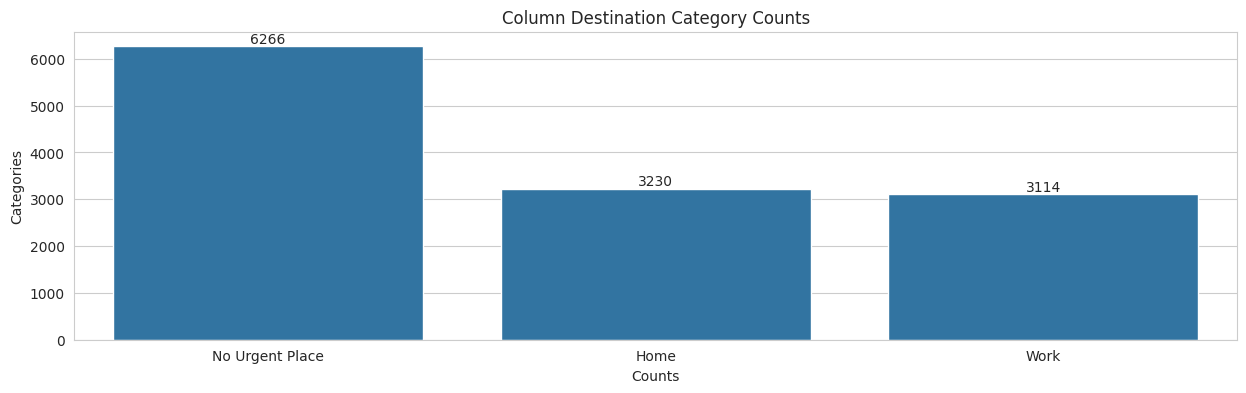

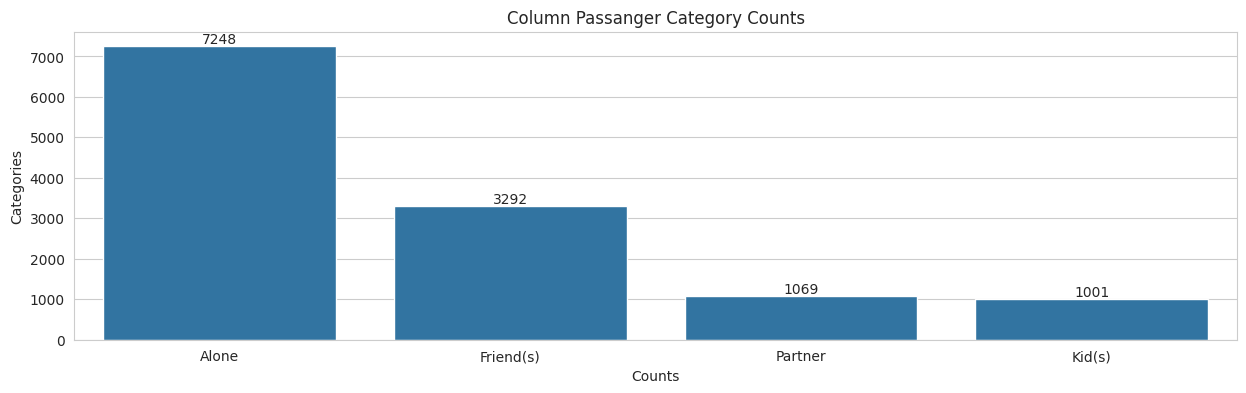

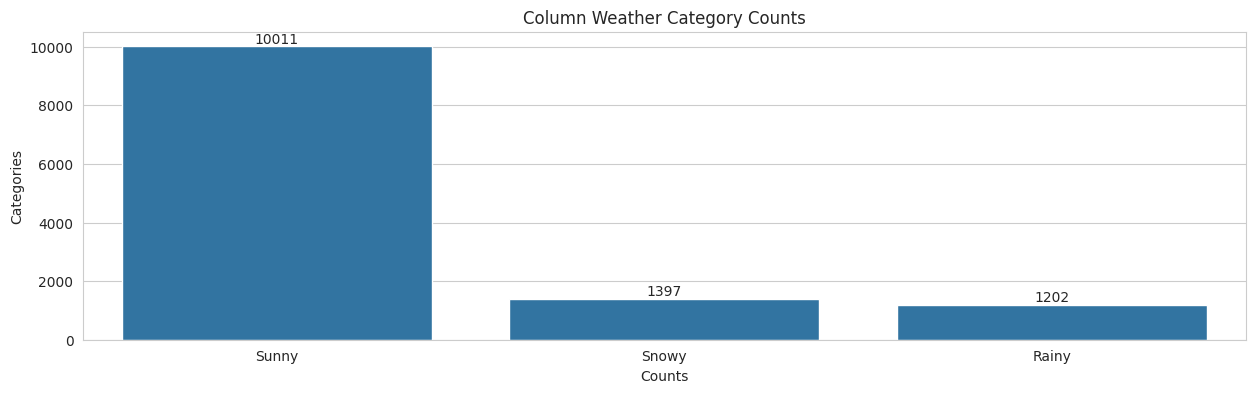

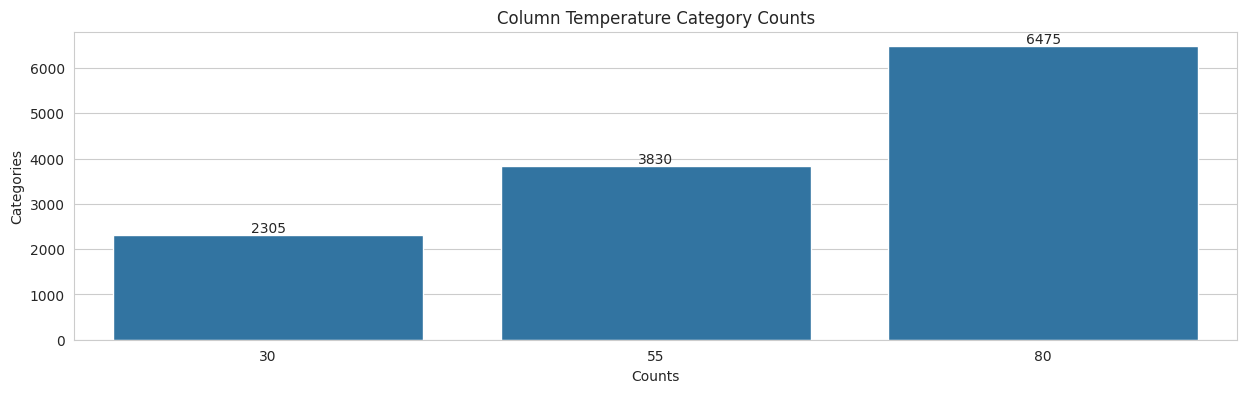

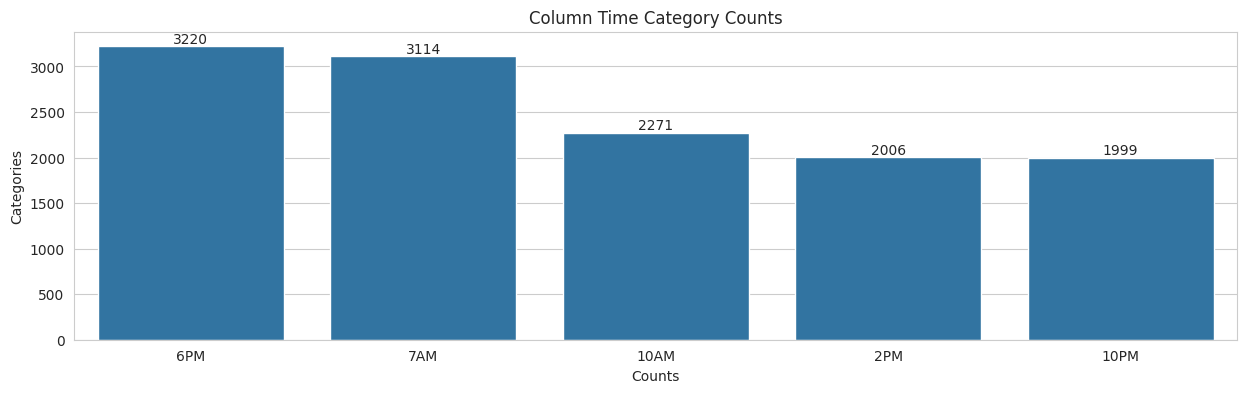

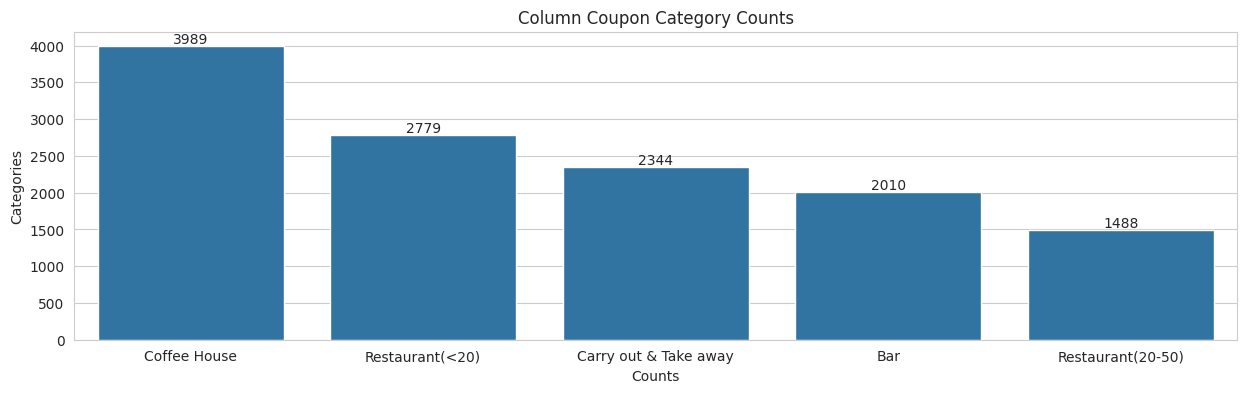

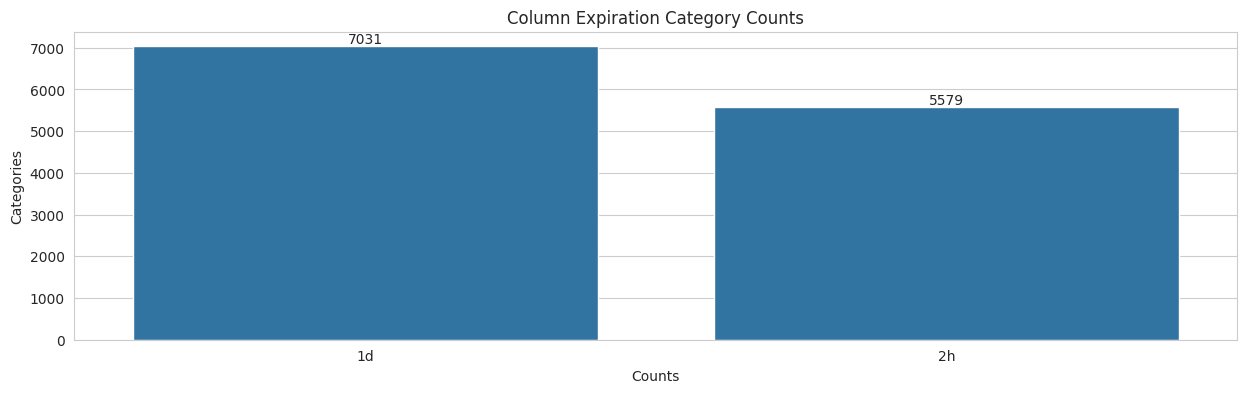

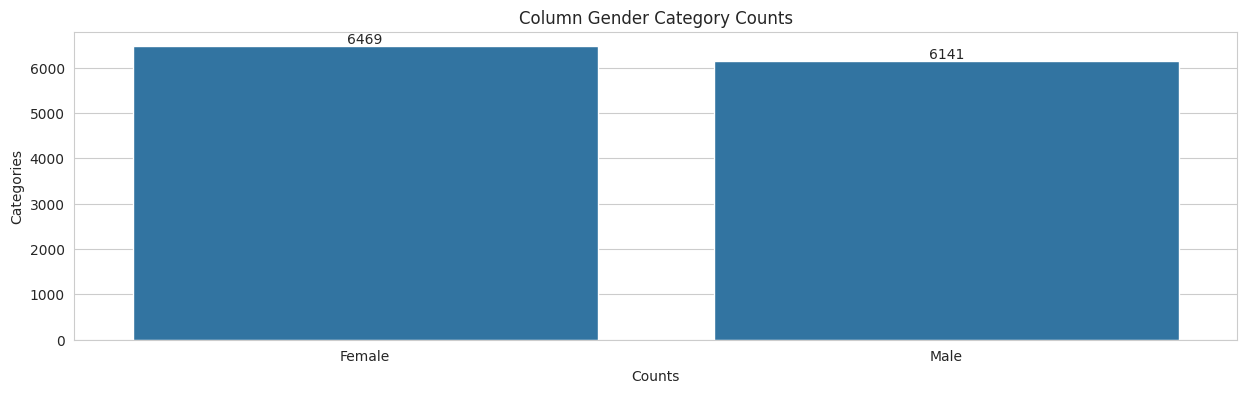

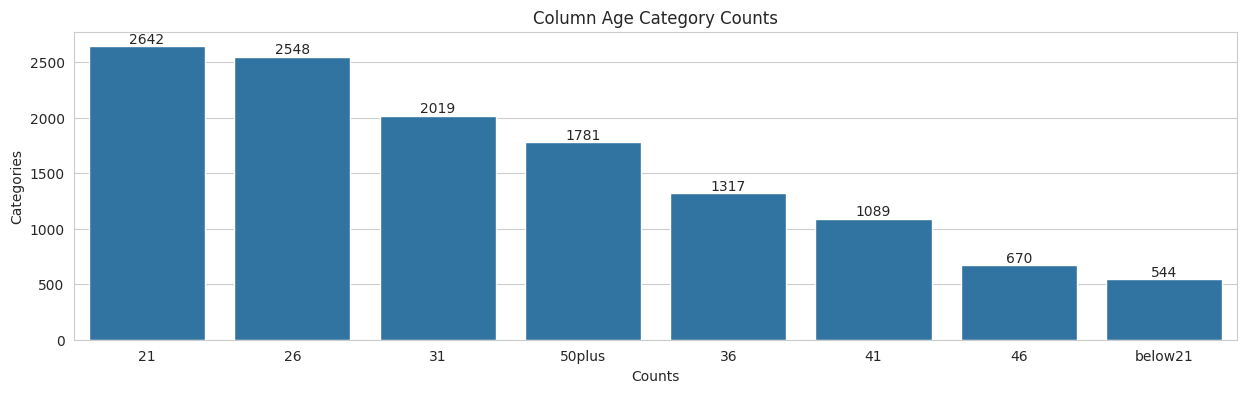

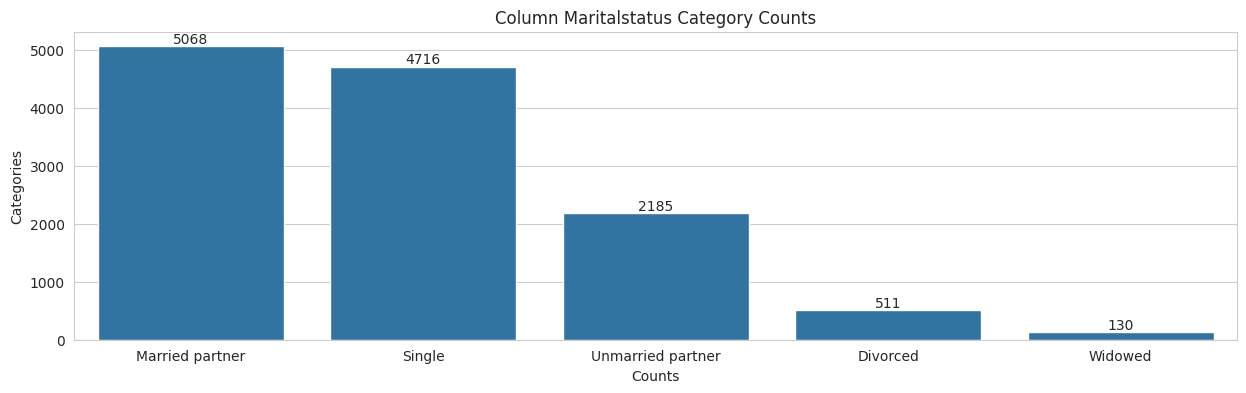

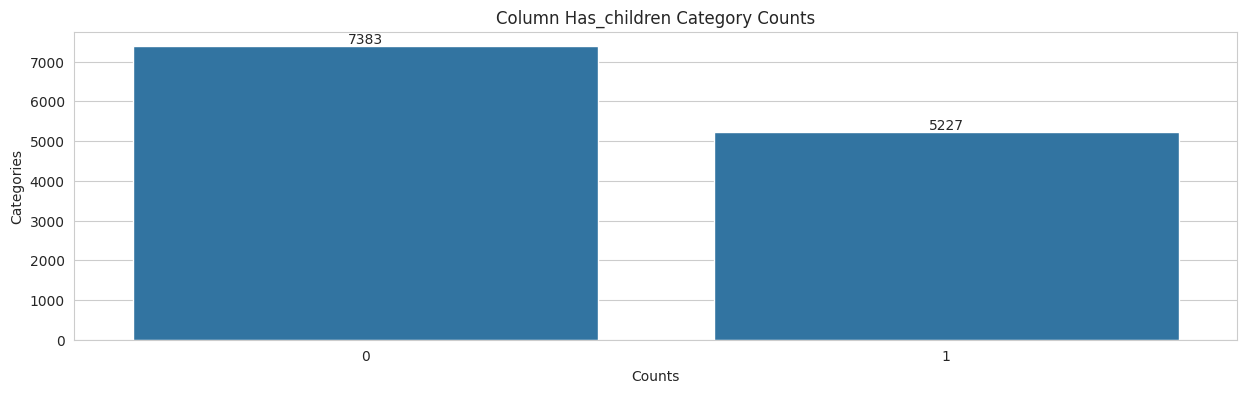

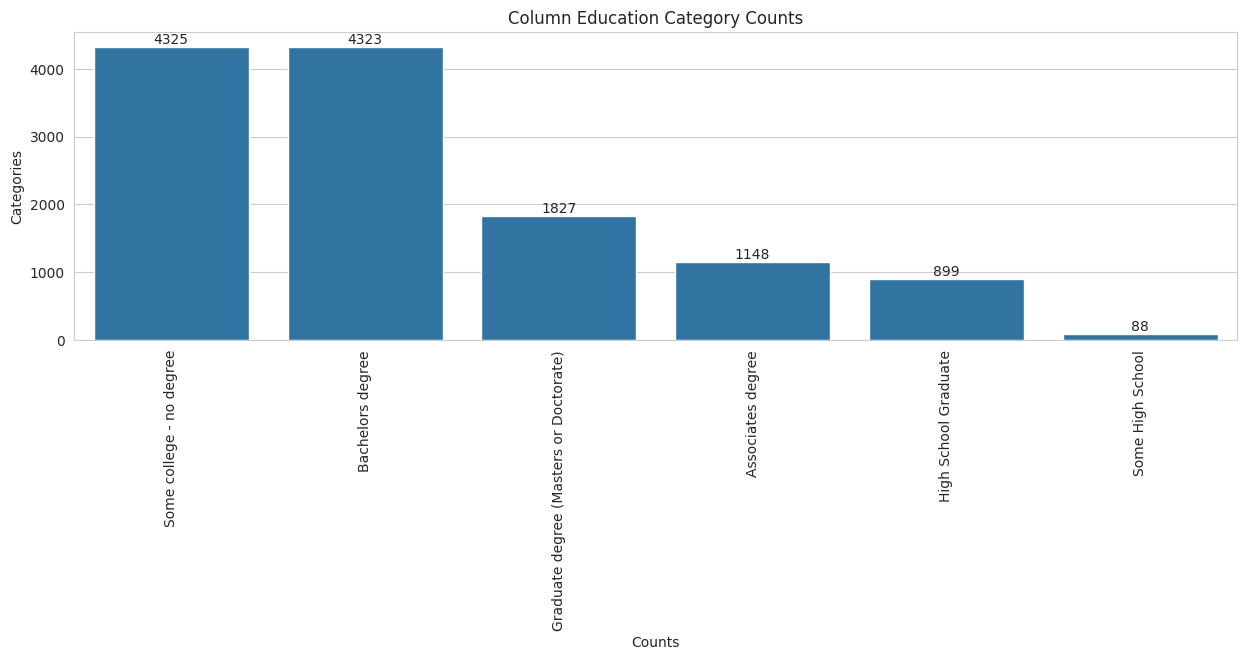

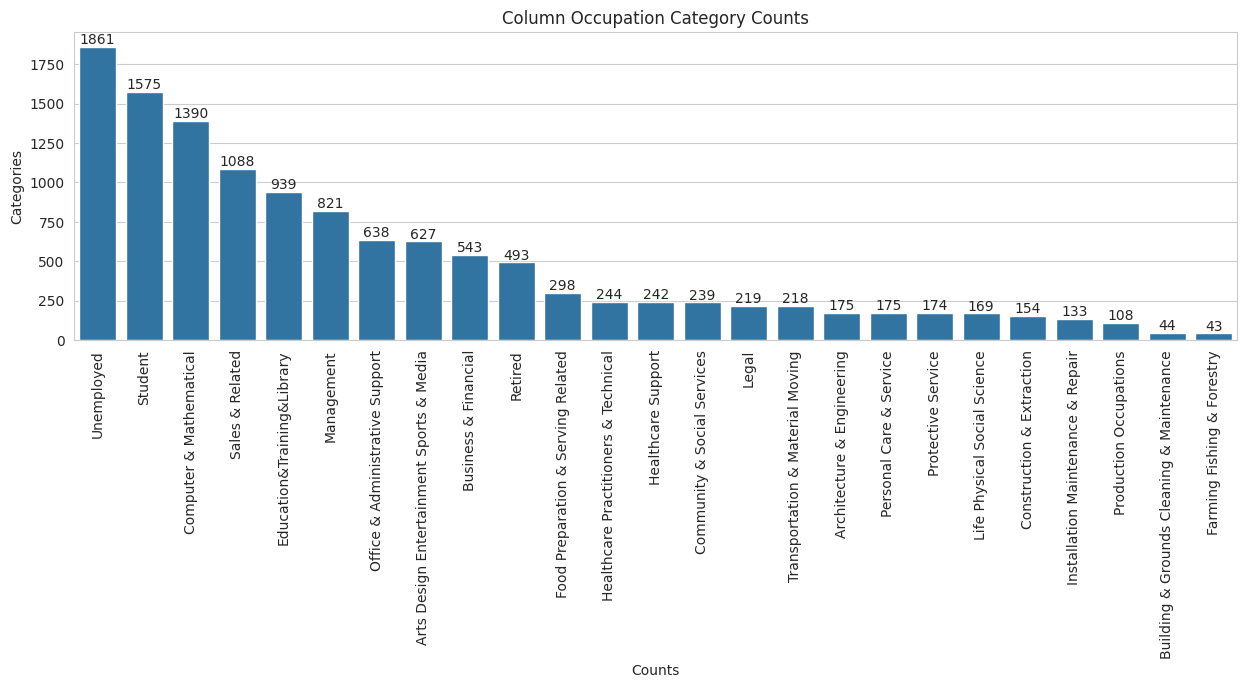

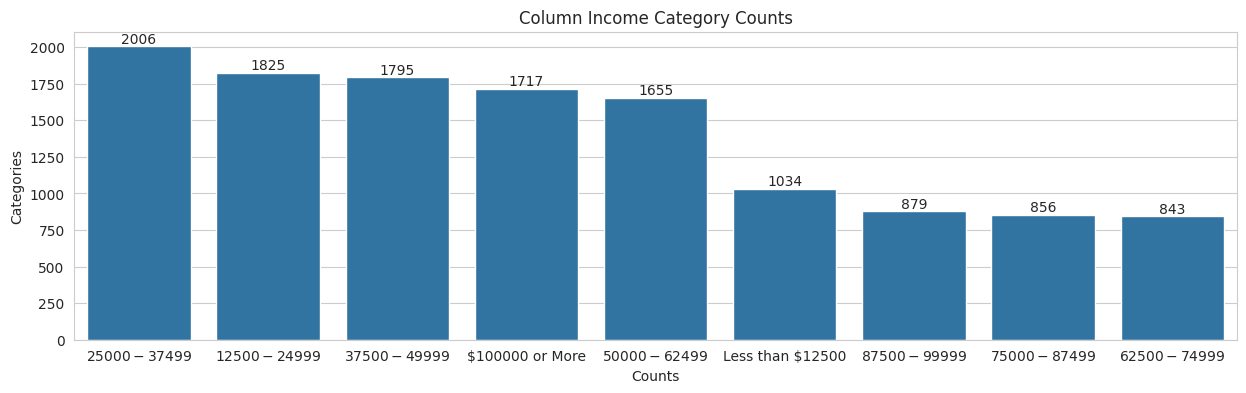

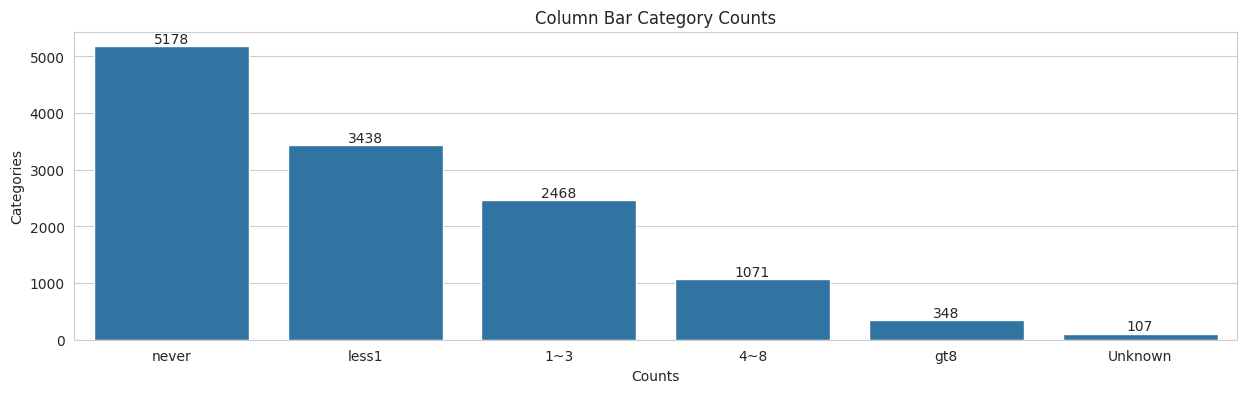

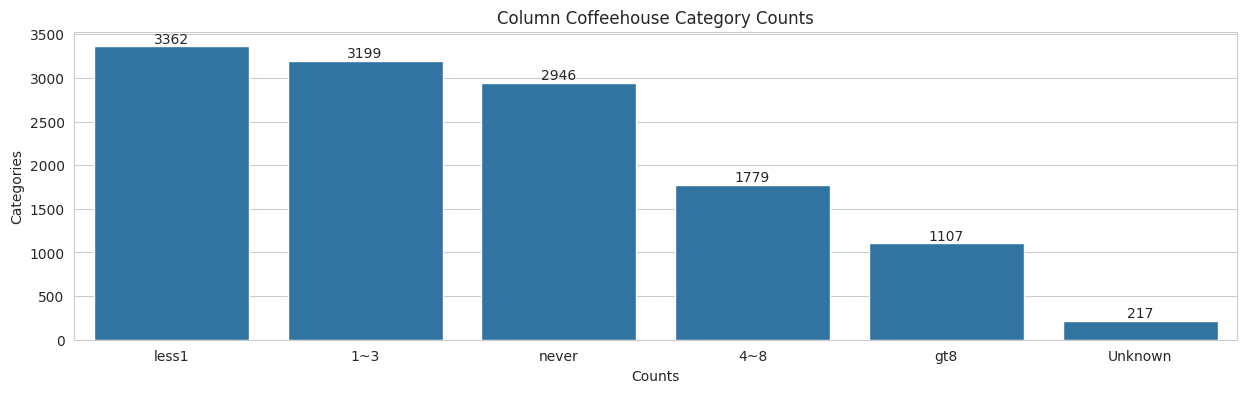

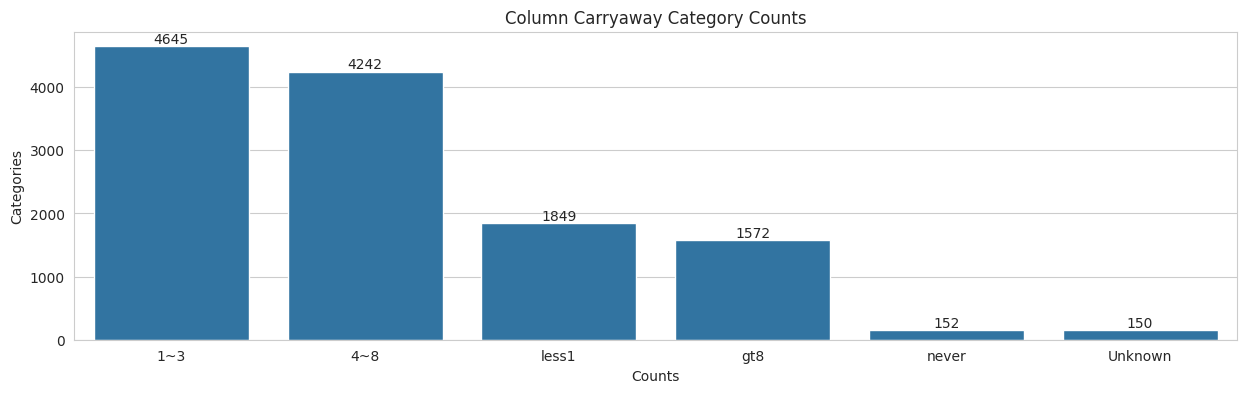

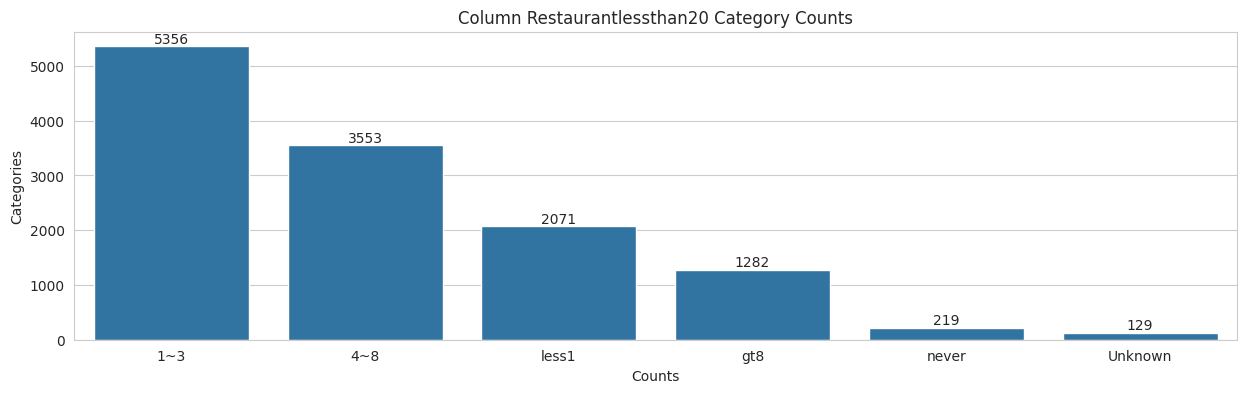

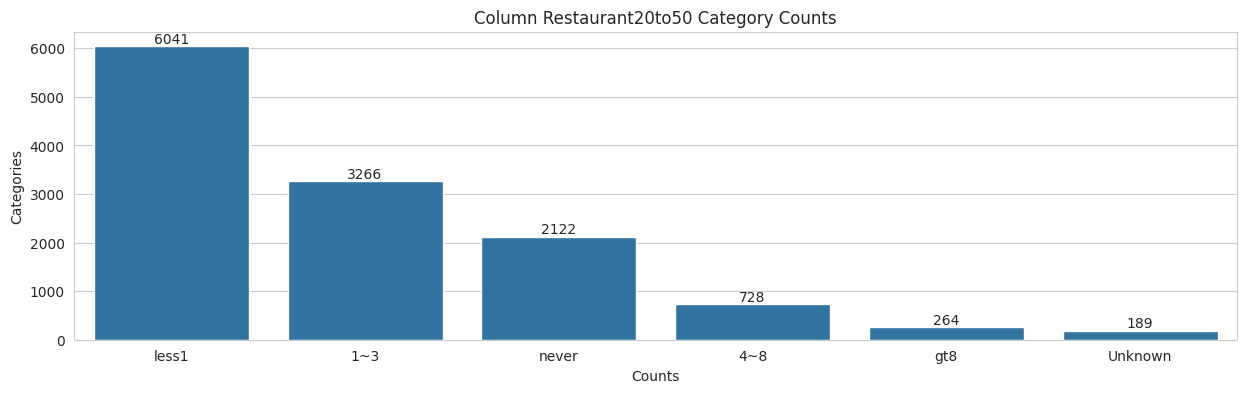

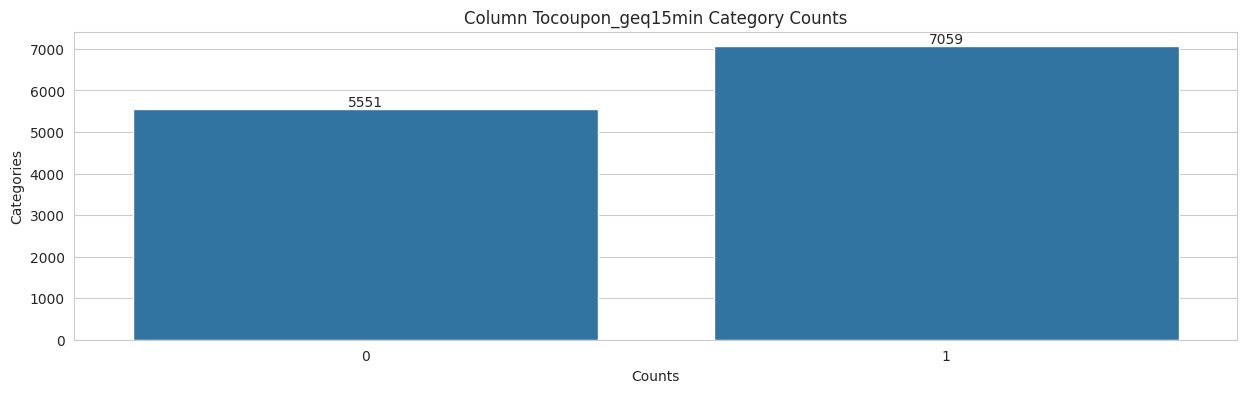

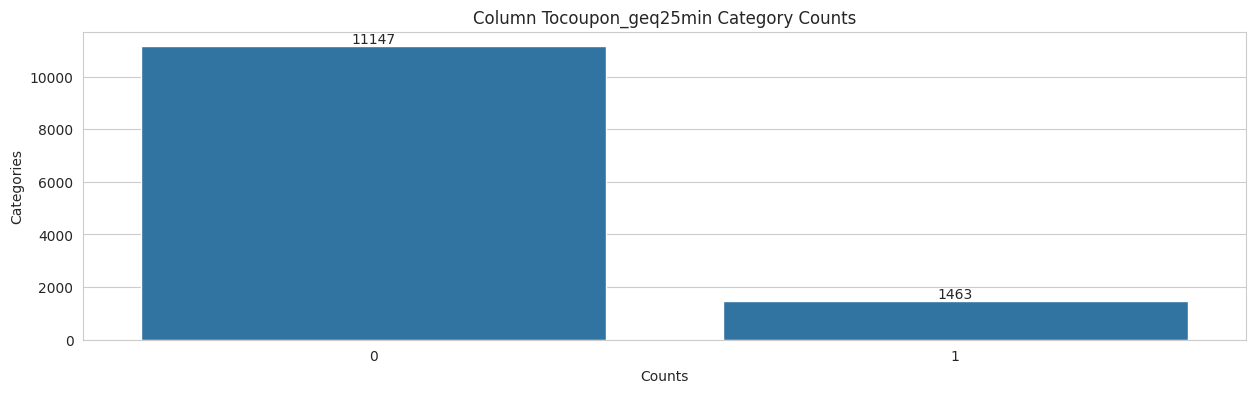

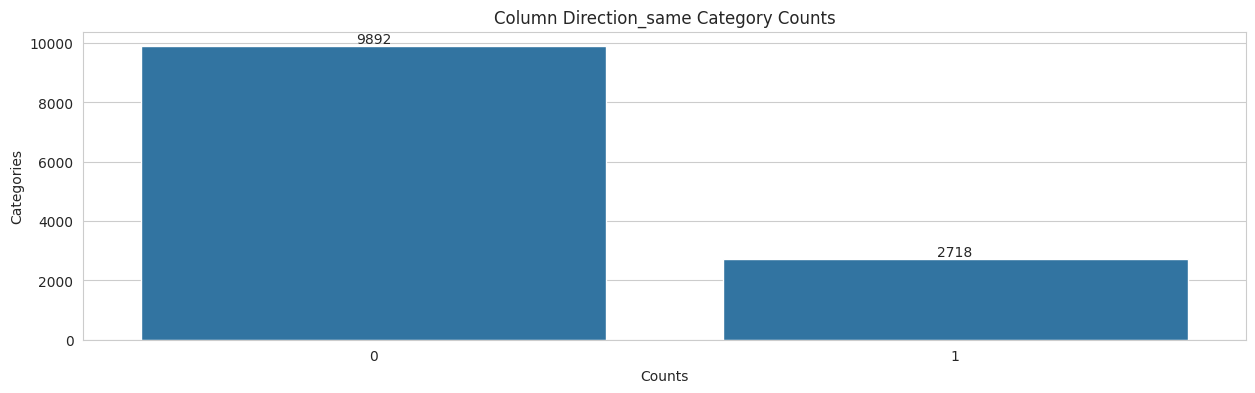

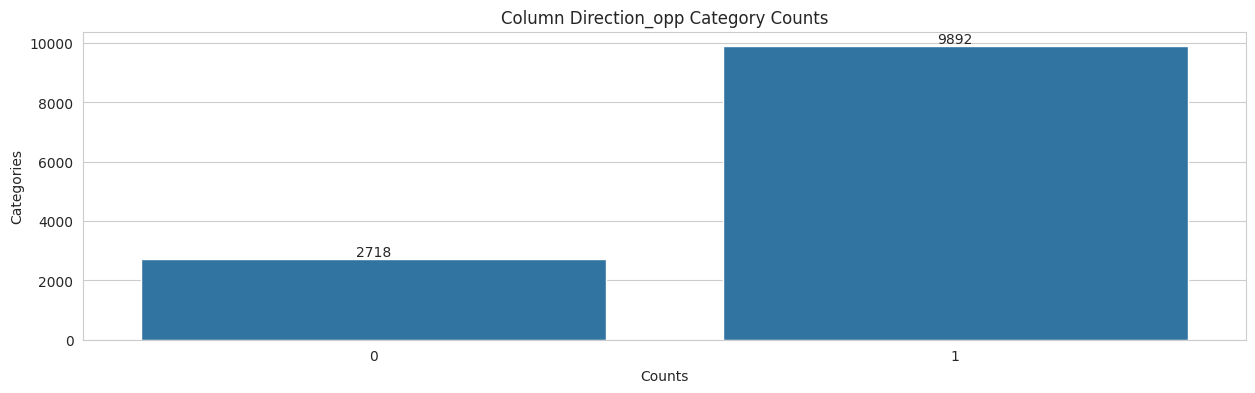

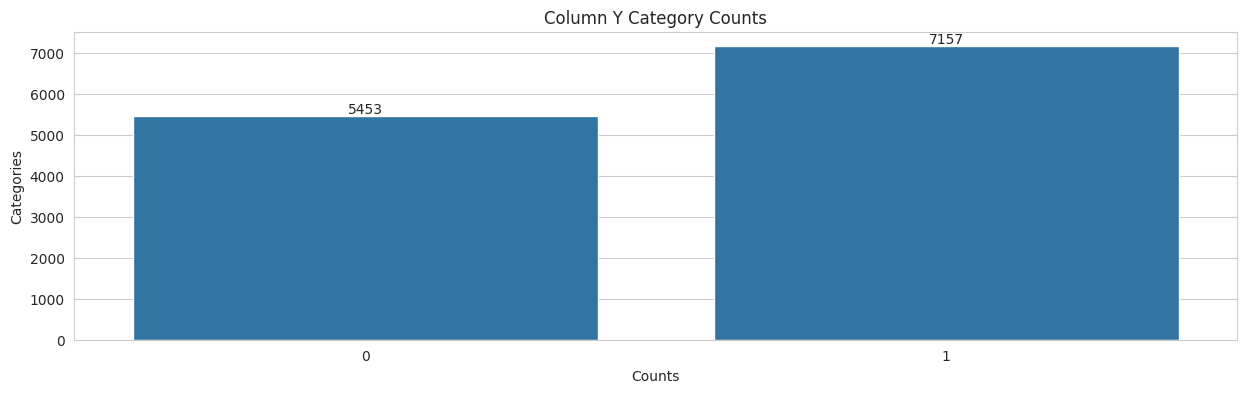

In [118]:
# Create a bar plot for the column categories

sns.set_style('whitegrid')

for column in data.columns:
  plt.figure(figsize=(15,4))
  bar_plot = sns.barplot(x=data[column].value_counts(dropna=False).index, y=data[column].value_counts(dropna=False))
  bar_plot.set(xlabel='Counts', ylabel='Categories', title='Column {0} Category Counts'.format(column.capitalize()))
  if column in [ 'education', 'occupation' ]:
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
  bar_plot.bar_label(bar_plot.containers[0])

In [100]:
# Check for duplicate rows

data[data.duplicated(keep = False)]

destination passanger weather  temperature  time                 coupon  \
4191        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4235        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4279        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender age    maritalStatus  ...  CoffeeHouse CarryAway  \
4191         1d    Male  26           Single  ...        never       1~3   
4192         1d    Male  26           Single  ...        never       1~3   
4235         1d    Male  26           Single  ...          gt8       gt8   
4236         1d    Male  26           Single  ...          gt8       gt8   
4279         1d  Female  26           Single  ...        never       4~8   
...         ...     ...  ..              ...  ...          ...       ...   
8511         2h    Male  46  Married partner  ...          1~3       1~3   
8512         2h    Male  46  Married partner  ...          1~3       1~3   
8513         2h    Male  46  Married partner  ...          1~3       1~3   
8515         1d    Male  46  Married partner  ...          1~3       1~3   
8516         1d    Male  46  Married partner  ...          1~3       1~3   

     RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
4191                less1            less1                1                 1   
4192                less1            less1                1                 1   
4235                  4~8            less1                1                 1   
4236                  4~8            less1                1                 1   
4279                  1~3            less1                1                 1   
...                   ...              ...              ...               ...   
8511                less1              1~3                1                 0   
8512                less1              1~3                1                 1   
8513                less1              1~3                1                 1   
8515                less1              1~3                1                 1   
8516                less1              1~3                1                 0   

     toCoupon_GEQ25min direction_same direction_opp  Y  
4191                 1              0             1  1  
4192                 1              0             1  1  
4235                 1              0             1  1  
4236                 1              0             1  1  
4279                 1              0             1  1  
...                ...            ...           ... ..  
8511                 0              1             0  1  
8512                 0              0             1  1  
8513                 1              0             1  0  
8515                 1              0             1  0  
8516                 0              1             0  1  

[148 rows x 26 columns]

3. Decide what to do about your missing data -- drop, replace, other...

In [101]:
# Only 99.14% of column car values are NaN. This column is not providing a lot of insight into customer behaviour. We can decide to drop the column.
data = data.drop('car', axis=1)
# All of column toCoupon_GEQ5min values are always 1. This column is not providing any insight into the customer behaviour. We can decide to drop the column.
data = data.drop('toCoupon_GEQ5min', axis=1)
# We can replace NaN values with a string to better visualize it.
data = data.fillna('Unknown')
# Remove duplicate rows.
data = data.drop_duplicates()
# Based on the data there does not seem to be any outliers.



4. What proportion of the total observations chose to accept the coupon?



[Text(0, 0, '0.567565'), Text(0, 0, '0.432435')]

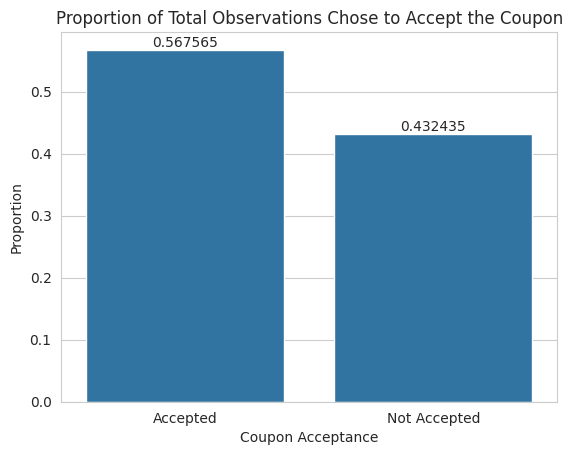

In [102]:
sns.set_style('whitegrid')
bar_plot = sns.barplot(data['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True))
bar_plot.set(xlabel='Coupon Acceptance', ylabel='Proportion', title='Proportion of Total Observations Chose to Accept the Coupon')
bar_plot.bar_label(bar_plot.containers[0])

5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, '3989'),
 Text(0, 0, '2779'),
 Text(0, 0, '2344'),
 Text(0, 0, '2010'),
 Text(0, 0, '1488')]

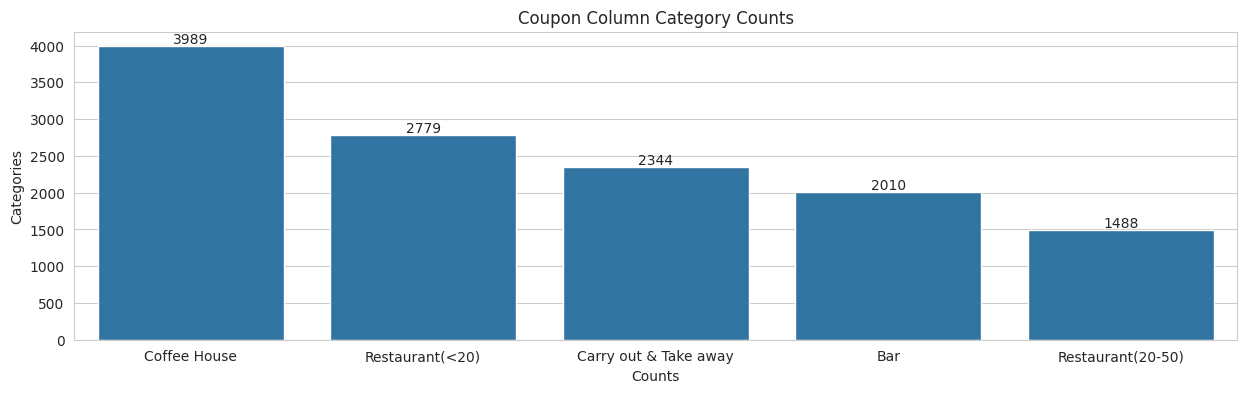

In [103]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,4))
bar_plot = sns.barplot(x=data['coupon'].value_counts(dropna=False).index, y=data['coupon'].value_counts(dropna=False))
bar_plot.set(xlabel='Counts', ylabel='Categories', title='Coupon Column Category Counts')
bar_plot.bar_label(bar_plot.containers[0])

6. Use a histogram to visualize the temperature column.

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Temperature Column Counts')]

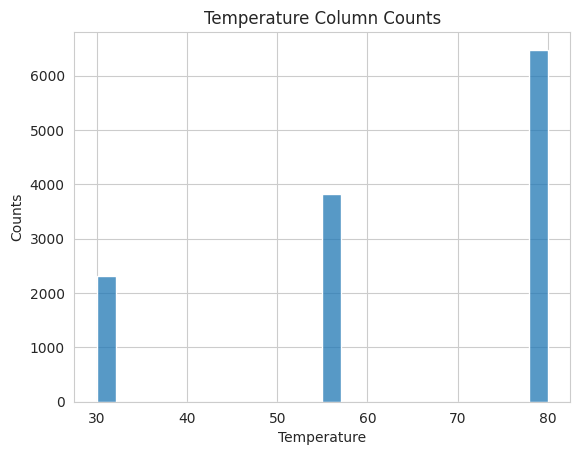

In [104]:
sns.set_style('whitegrid')
sns.histplot(data['temperature']).set(xlabel='Temperature', ylabel='Counts', title='Temperature Column Counts')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [105]:
bar_data = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


[Text(0, 0, '0.59005'), Text(0, 0, '0.40995')]

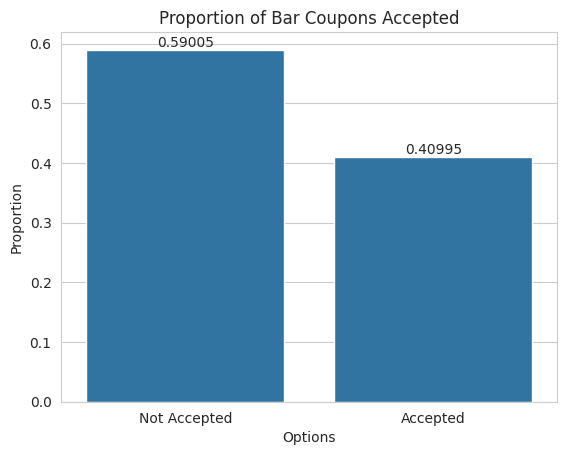

In [106]:
sns.set_style('whitegrid')
bar_plot = sns.barplot(bar_data['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True))
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion of Bar Coupons Accepted')
bar_plot.bar_label(bar_plot.containers[0])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


[Text(0, 0, '0.731818'), Text(0, 0, '0.268182')]

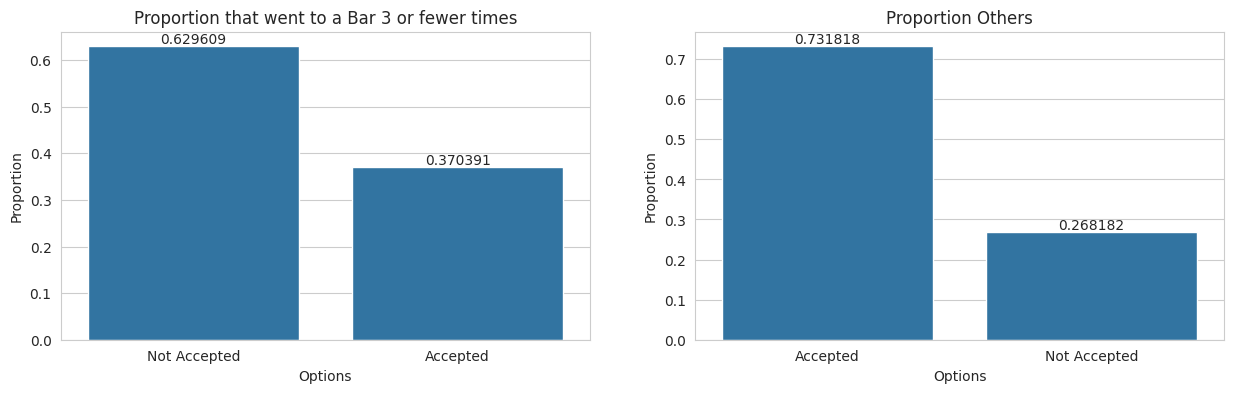

In [107]:
condition = bar_data['Bar'].isin(['never', 'less1', '1~3'])
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
bar_plot = sns.barplot(data=bar_data[condition]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[0])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion that went to a Bar 3 or fewer times')
bar_plot.bar_label(bar_plot.containers[0])
bar_plot = sns.barplot(data=bar_data[~condition]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[1])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion Others')
bar_plot.bar_label(bar_plot.containers[0])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


[Text(0, 0, '0.665409'), Text(0, 0, '0.334591')]

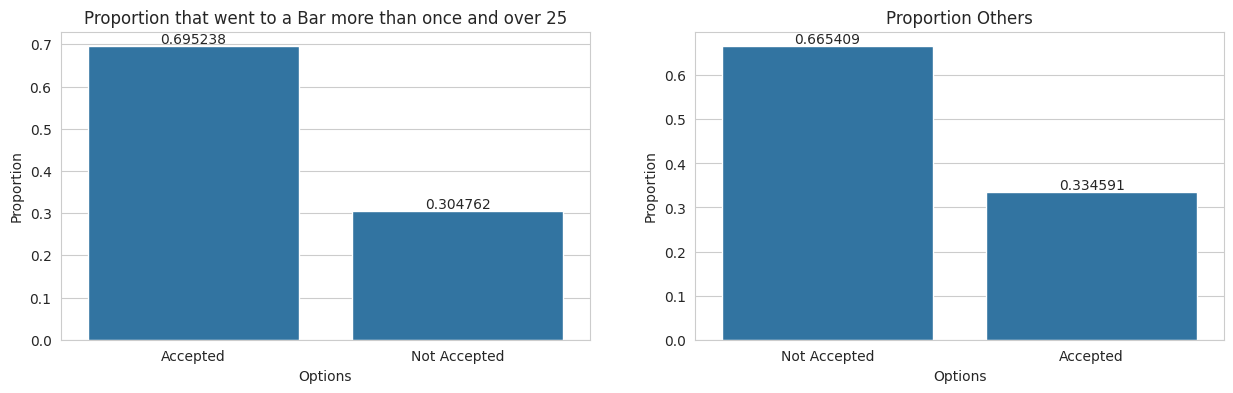

In [108]:
condition = (bar_data['Bar'].isin(['1~3', '4~8', 'gt8']) & ~bar_data['age'].isin(['below21', '21']))
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
bar_plot = sns.barplot(data=bar_data[condition]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[0])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion that went to a Bar more than once and over 25')
bar_plot.bar_label(bar_plot.containers[0])
bar_plot = sns.barplot(data=bar_data[~condition]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[1])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion Others')
bar_plot.bar_label(bar_plot.containers[0])

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


[Text(0, 0, '0.704592'), Text(0, 0, '0.295408')]

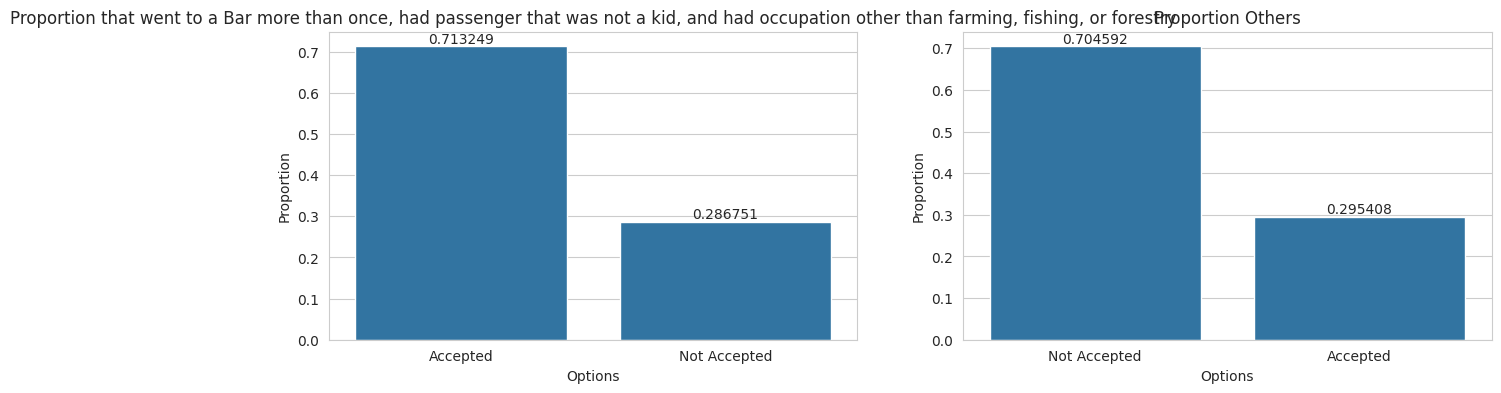

In [109]:
condition = (bar_data['Bar'].isin(['1~3', '4~8', 'gt8']) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['occupation'] != 'Farming Fishing & Forestry'))
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
bar_plot = sns.barplot(data=bar_data[condition]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[0])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion that went to a Bar more than once, had passenger that was not a kid, and had occupation other than farming, fishing, or forestry')
bar_plot.bar_label(bar_plot.containers[0])
bar_plot = sns.barplot(data=bar_data[~condition]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[1])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion Others')
bar_plot.bar_label(bar_plot.containers[0])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



[Text(0, 0, '0.641434'), Text(0, 0, '0.358566')]

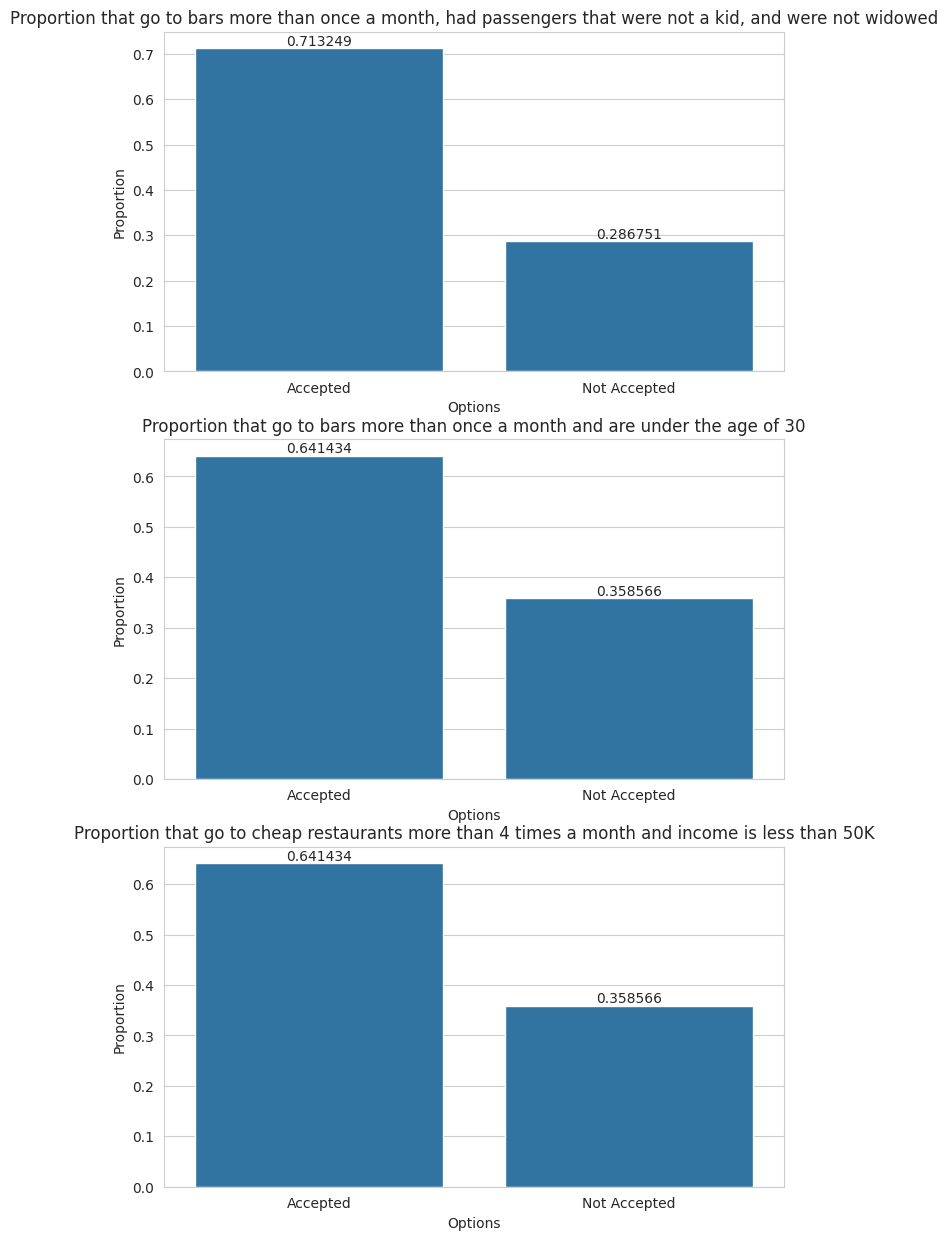

In [110]:
condition1 = (bar_data['Bar'].isin(['1~3', '4~8', 'gt8']) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed'))
condition2 = (bar_data['Bar'].isin(['1~3', '4~8', 'gt8']) & (~bar_data['age'].isin(['below21', '21', '26'])))
condition3 = (bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & (bar_data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])))

fig, axes = plt.subplots(3, 1, figsize=(8, 15))
bar_plot = sns.barplot(data=bar_data[condition1]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[0])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion that go to bars more than once a month, had passengers that were not a kid, and were not widowed')
bar_plot.bar_label(bar_plot.containers[0])
bar_plot = sns.barplot(data=bar_data[condition2]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[1])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion that go to bars more than once a month and are under the age of 30')
bar_plot.bar_label(bar_plot.containers[0])
bar_plot = sns.barplot(data=bar_data[condition2]['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }).value_counts(normalize=True), ax=axes[2])
bar_plot.set(xlabel='Options', ylabel='Proportion', title='Proportion that go to cheap restaurants more than 4 times a month and income is less than 50K')
bar_plot.bar_label(bar_plot.containers[0])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

41% of drivers have accepted bar coupons.

The probability that the driver accepts or not the coupon is affected by the following conditions:

1.- Drivers that have gone to a bar 3 or less time in a month are less likely to accept the coupon.

2.- Drivers that went to a Bar more than once and over 25 are more likely to accept the coupon.

3.- Drivers that went to a Bar more than once, had passenger that was not a kid, and had occupation other than farming, fishing, or forestry are more likely to accept the coupon.

4.- Drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed are more likely to accept the coupon than the other two conditions.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [124]:
# The following helper function will create a frequency heat map for each data column against the coupon column to visualize how the categories affect the customer's decision to use the coupon.

def generate_heat_maps(coupon):
  coupon_data = data[data['coupon'] == coupon]

  for column in data.columns:
    if column not in [ 'Y', 'coupon' ]:
      plt.figure(figsize=(15,4))
      crosstab = pd.crosstab(coupon_data['Y'].replace({ 0: 'Not Accepted', 1: 'Accepted' }), coupon_data[column].replace({ 0: 'No', 1: 'Yes' }), normalize='columns')
      heat_map = sns.heatmap(crosstab, annot=True, fmt='.2f')
      heat_map.set(xlabel=column.capitalize(), ylabel='Coupon Acceptance', title='Frequency of {0} and Coupon Acceptance'.format(column.capitalize()))

<ipython-input-124-bbc45a4c7e6d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,4))


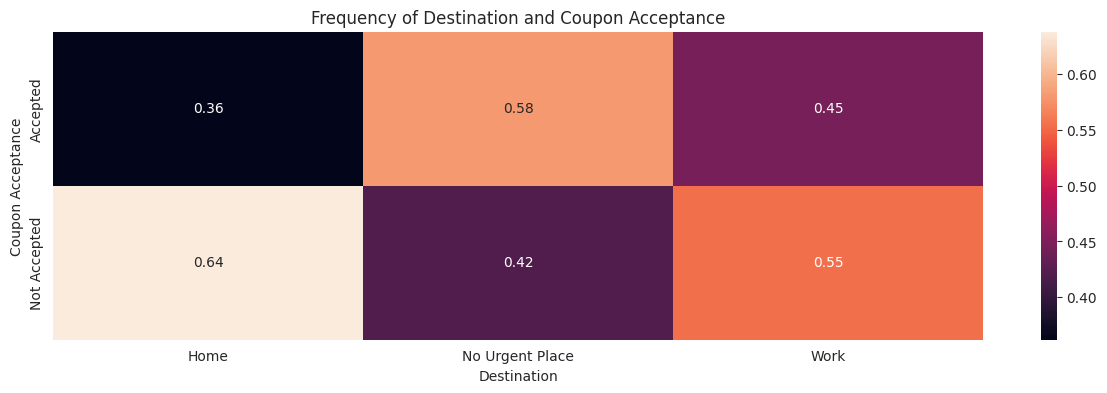

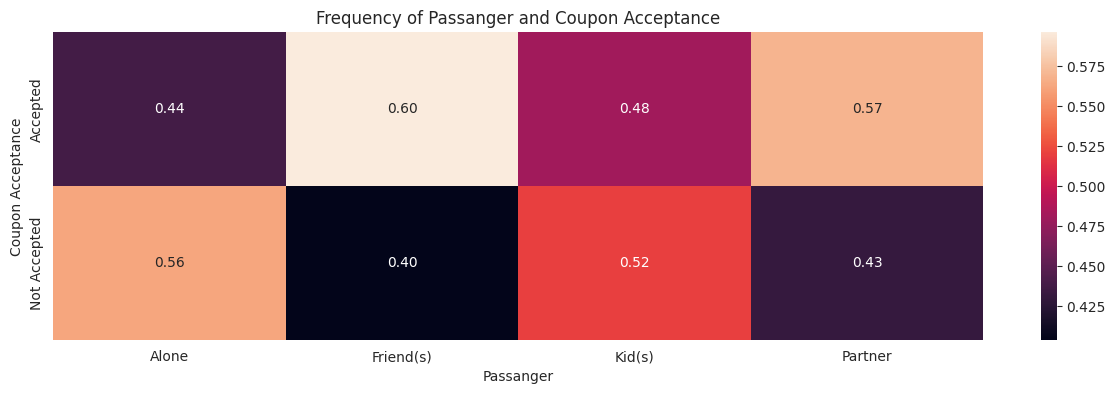

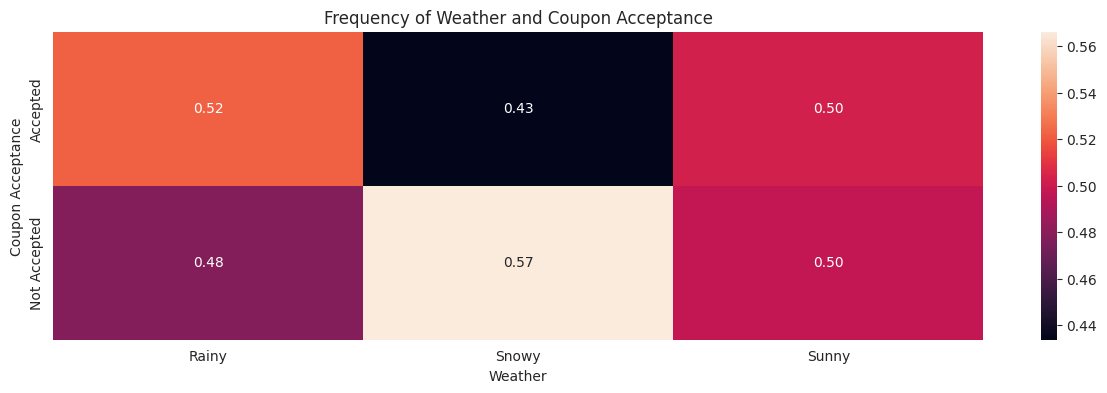

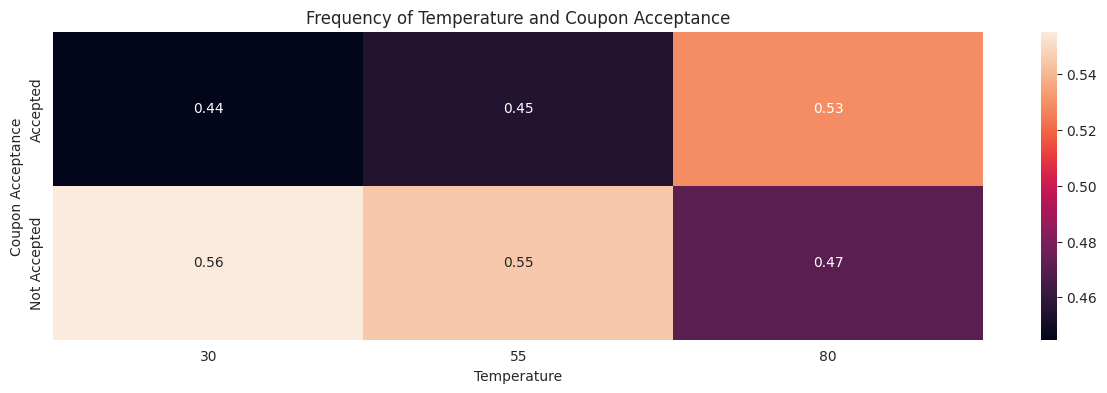

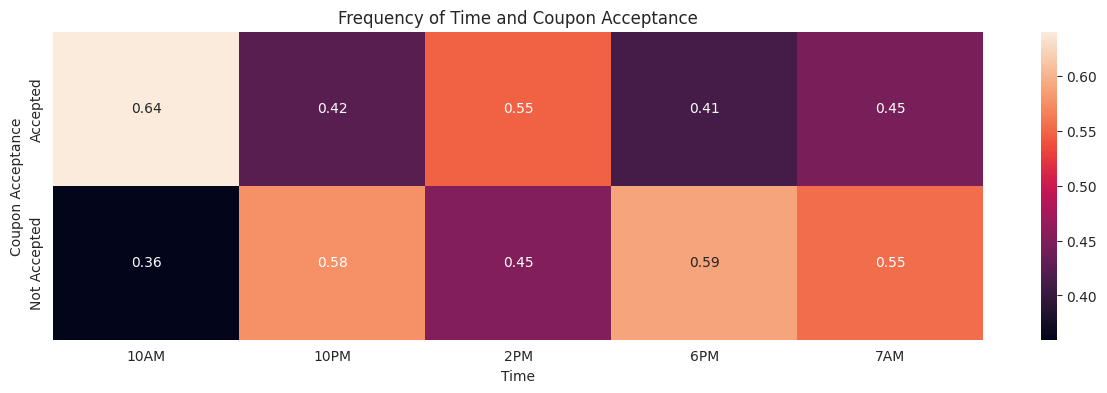

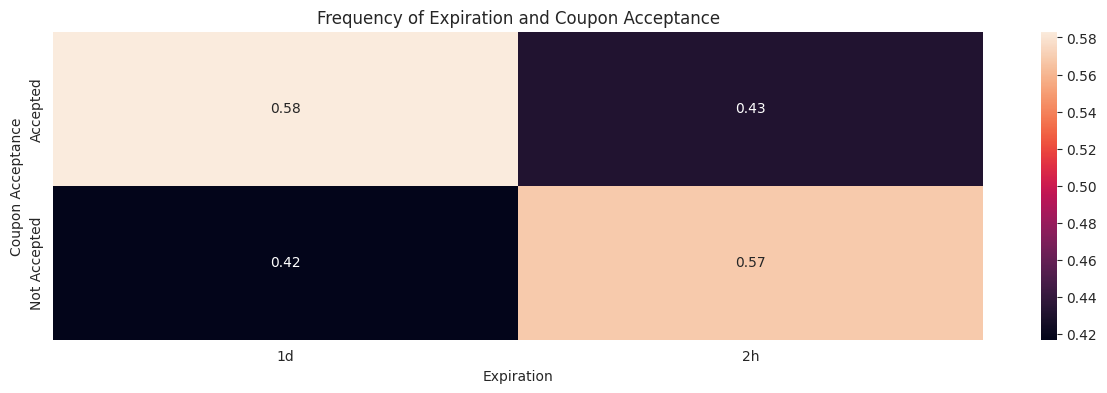

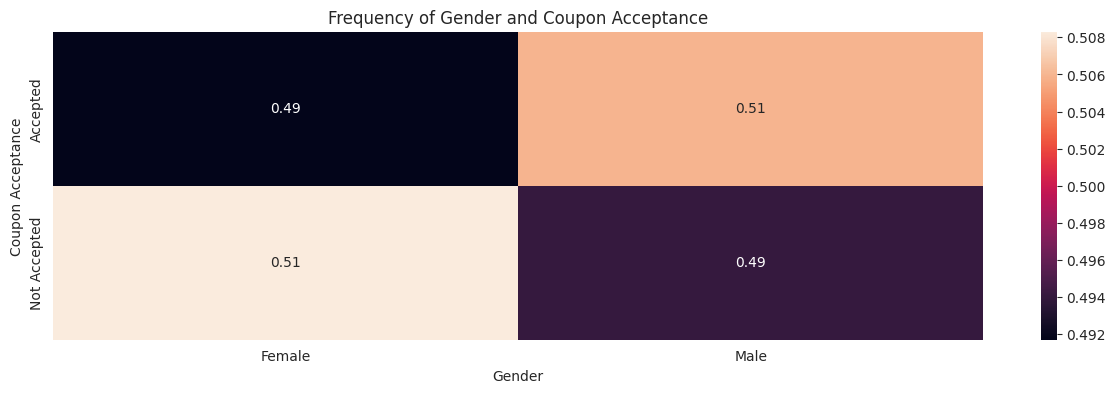

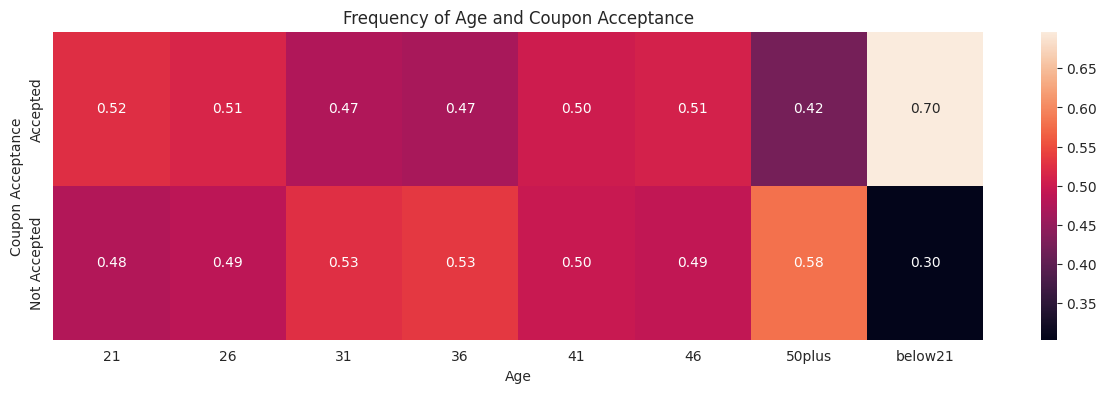

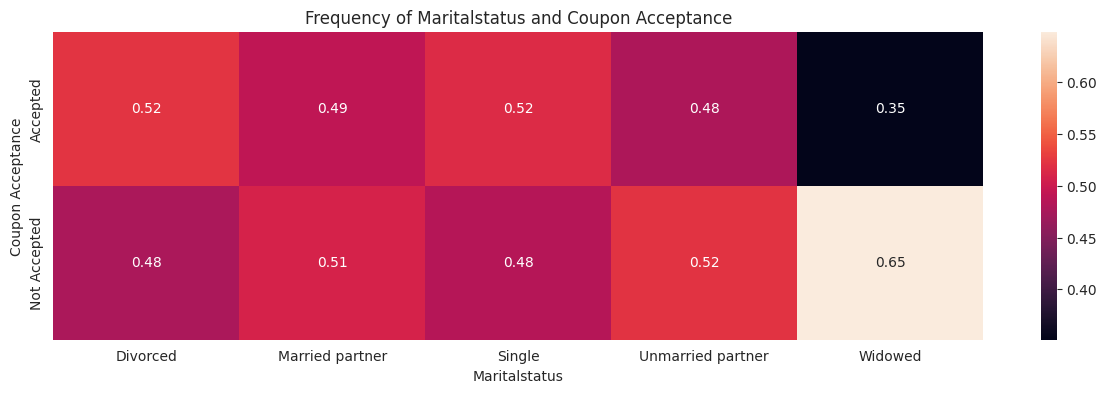

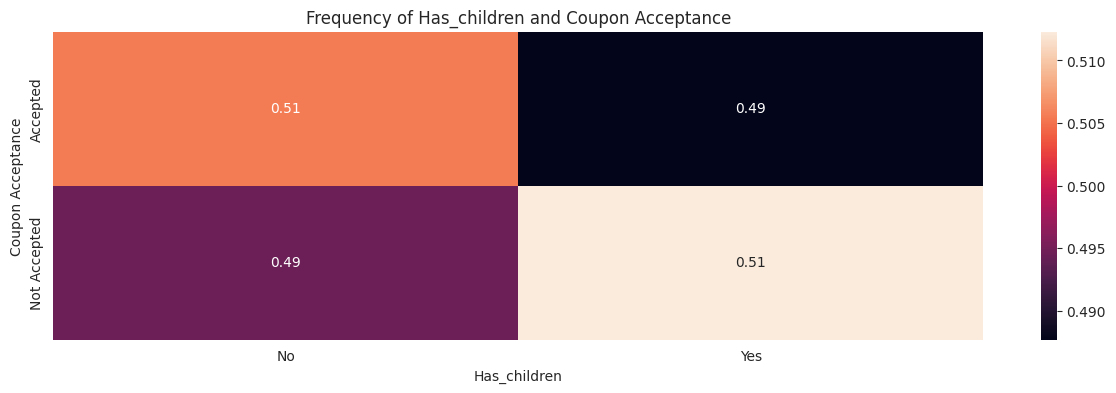

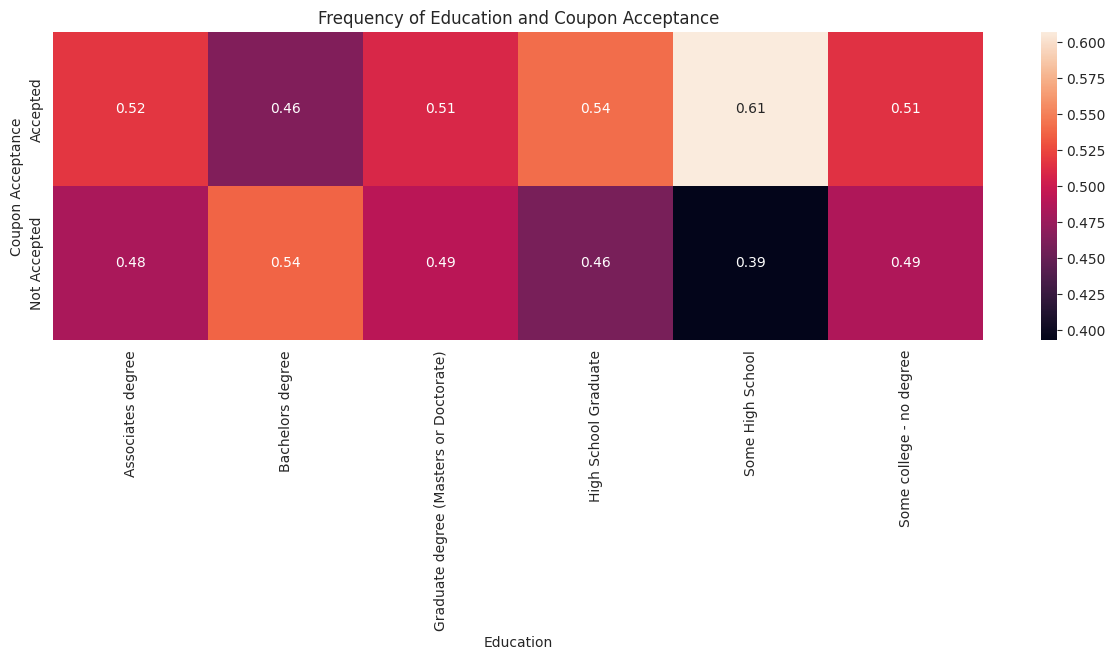

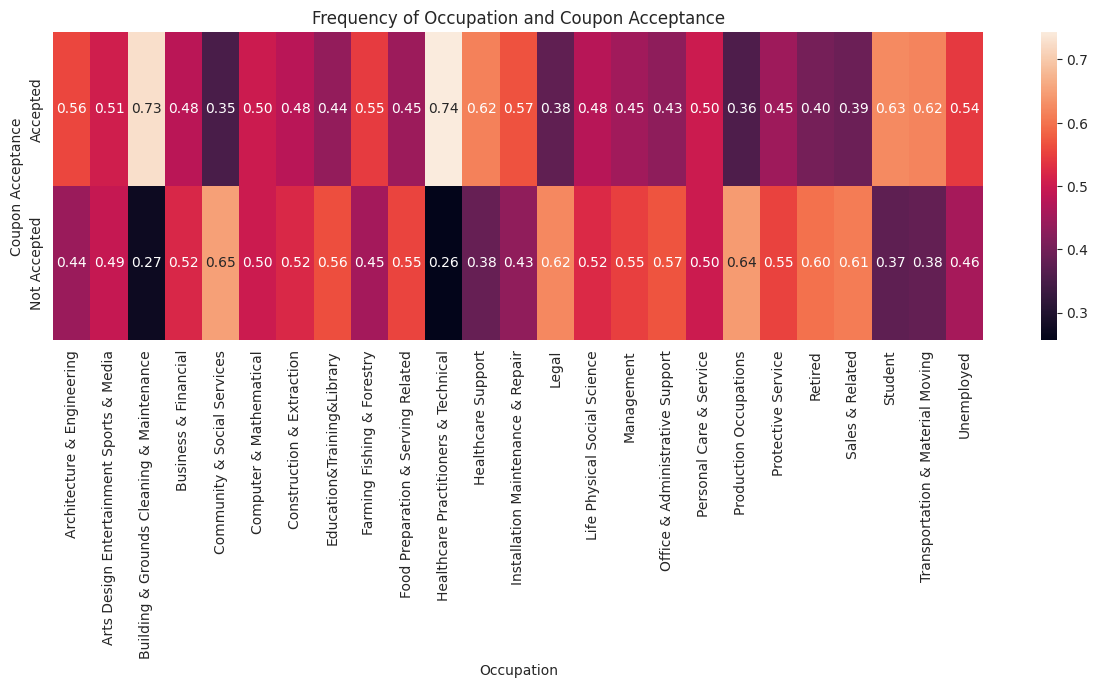

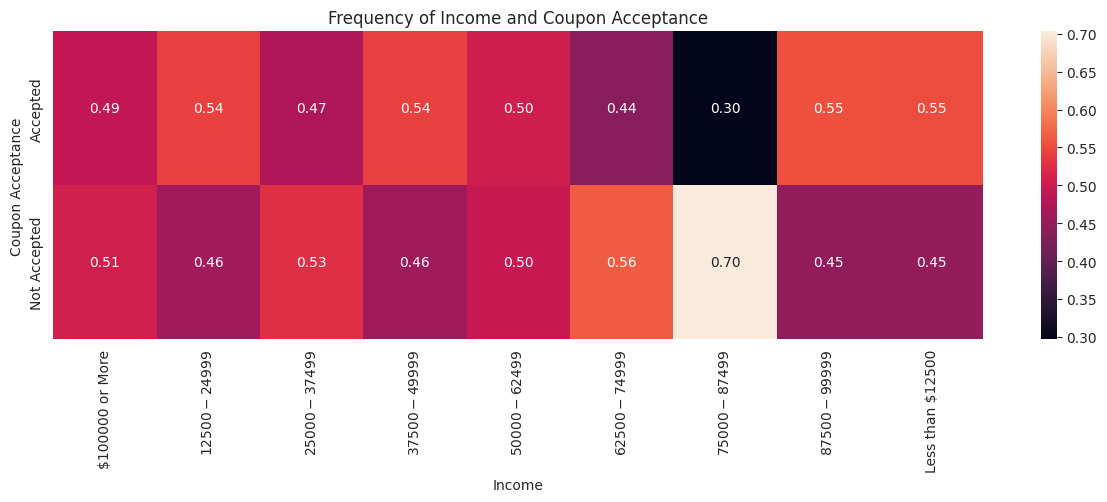

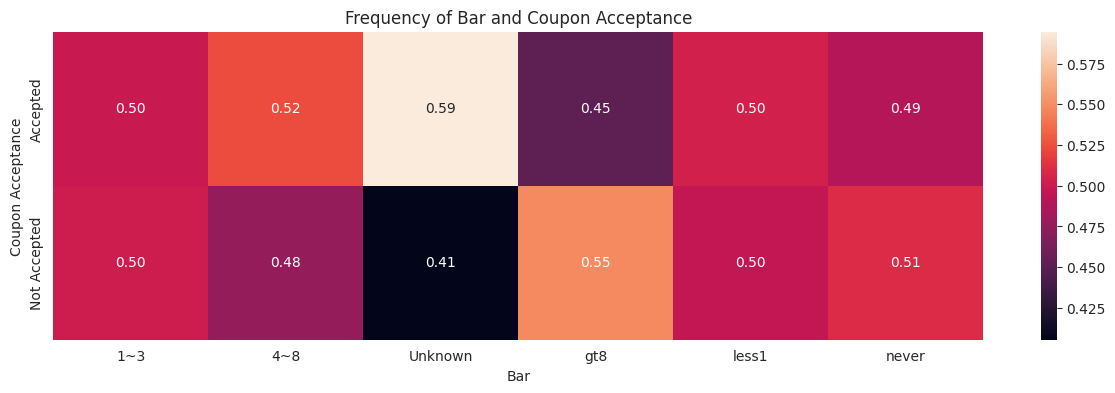

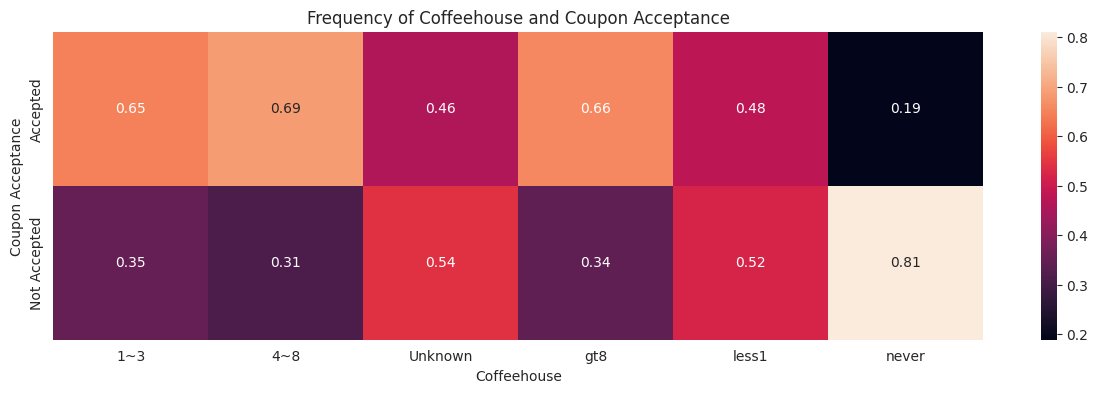

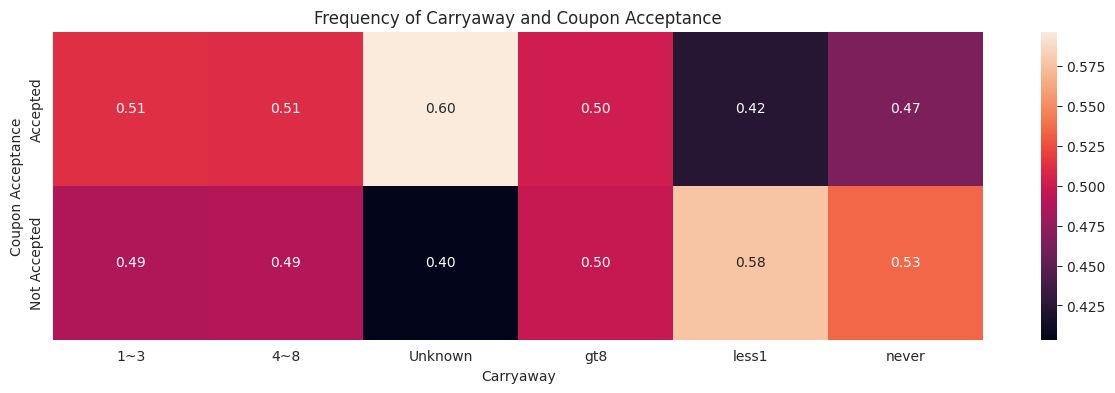

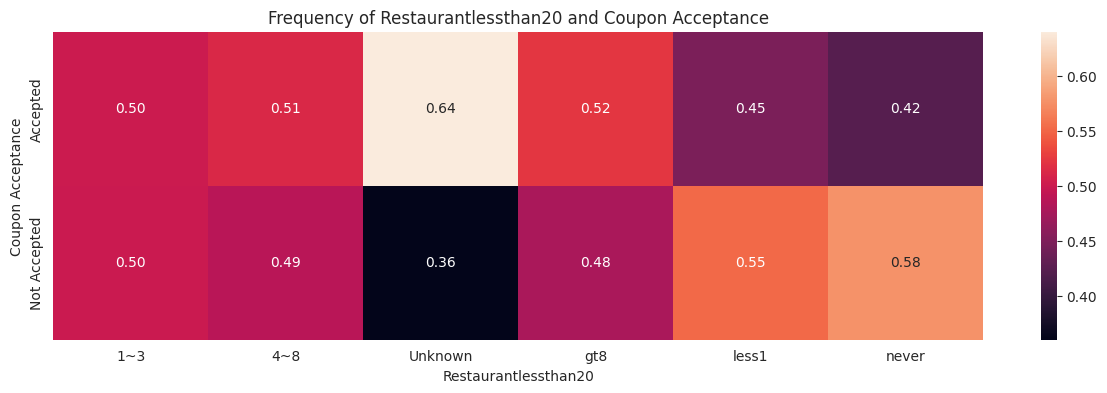

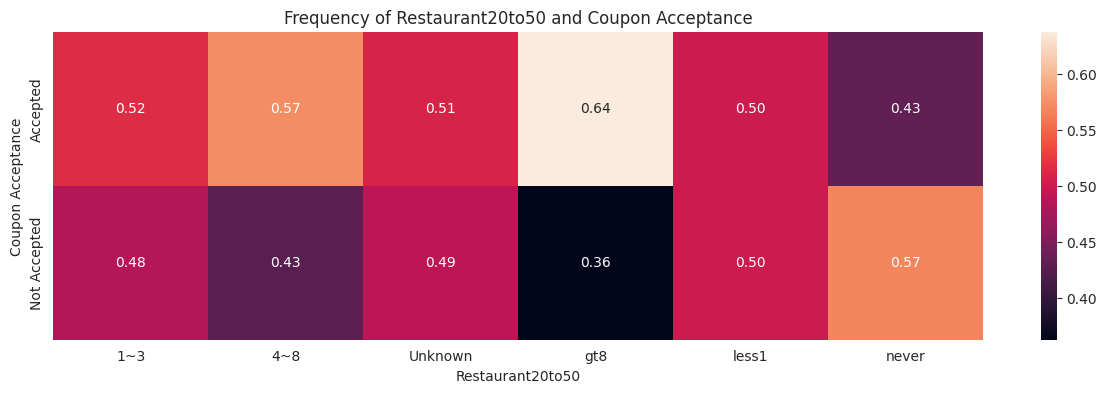

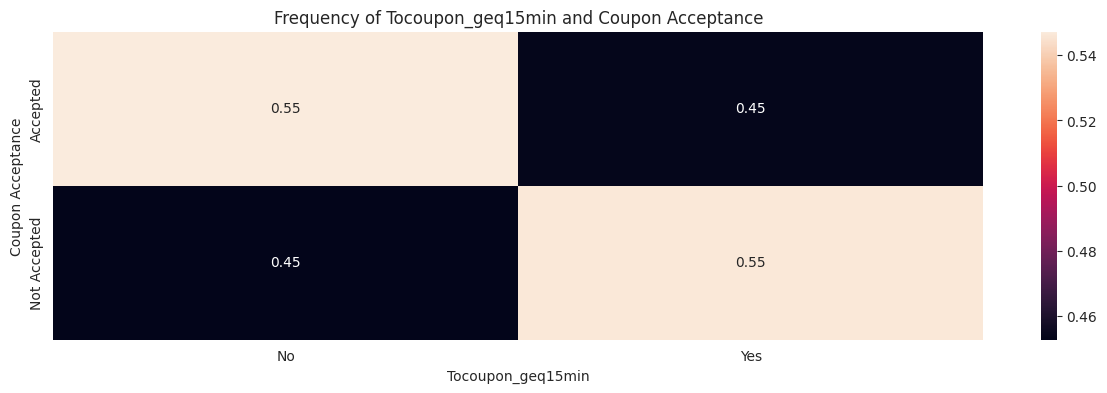

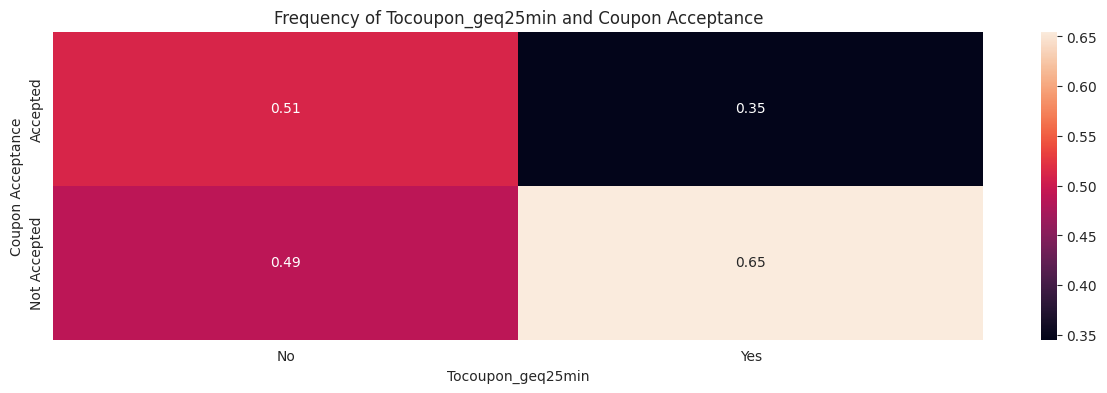

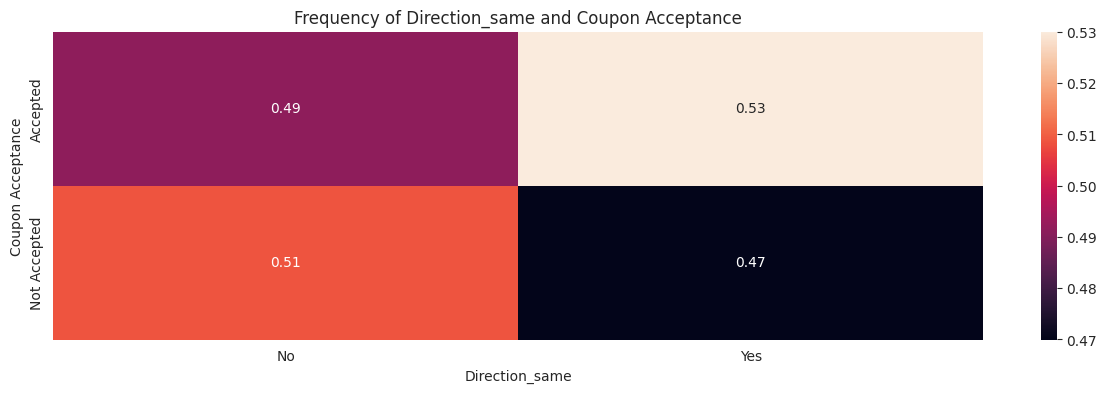

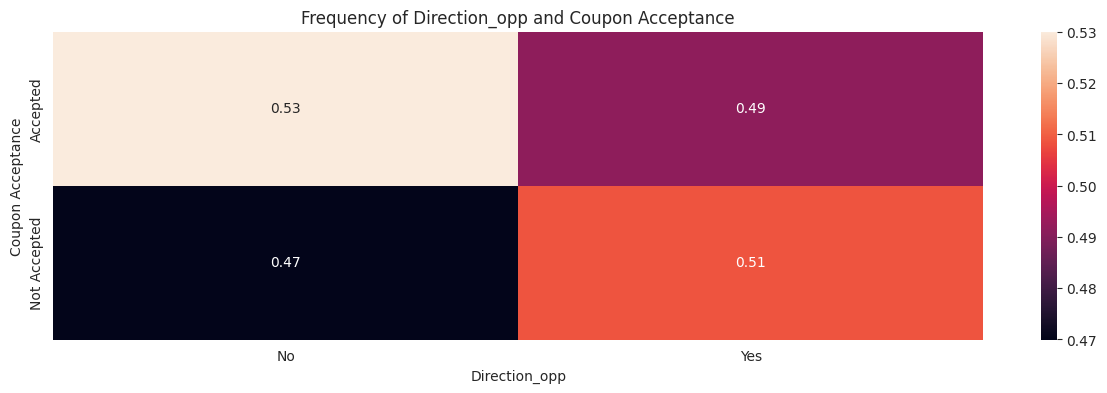

In [125]:
# The following code will create, for coupon type Coffee House, frequency heat maps between the data columns and coupon column to visualize how the categories affect the customer's decision.

generate_heat_maps('Coffee House')

For the Coffee House coupon we can reach the following conclusions based on the ratios. The chances that the driver will use the coupon will increase under any of these conditions (in order of highest acceptance rate):

1.- Work in Building & Grounds Cleaning & Maintenance or Healthcare Practitioners & Technical with 73% acceptance rate.

2.- Are below 21 years old with 70% acceptance rate.

3.- Frequent a coffee shops 4 to 8 times with 69% acceptance rate.

4.- Driving at 10am with 64% acceptance rate.

5.- Frequent restaurants (20-50) more than 8 times with 64% acceptance rate.

6.- Have some high school degree with 61% acceptance rate.

7.- With friend(s) or partner with 60% acceptance rate.

8.- Frequent a bar 4 to 8 times with 59% acceptance rate.

9.- Not urgent to get to their destination with 58% acceptance rate.

10.- The coupon expires in a day with 58% acceptance rate.

11.- Earn less than 12500 or between 87500 and 99999 with 54% acceptance rate.

12.- Driving on temperature of 80 with 53% acceptance rate.

13.- Coffee shop is 5 minutes in the same direction with 53% acceptance rate.

14.- Are divorced or single with 52% acceptance rate.

15.- Do not have children with 51% acceptance rate.

16.- Frequent restaurants (20) more than 1 time with 51% acceptance rate.

17.- Driving under rainy or sunny weather with 50% acceptance rate.

18.- Orders carry out or take away more than 1 time with 50% acceptance rate.

Consider sending the Coffee House coupons to customer under these conditions.

<ipython-input-124-bbc45a4c7e6d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,4))


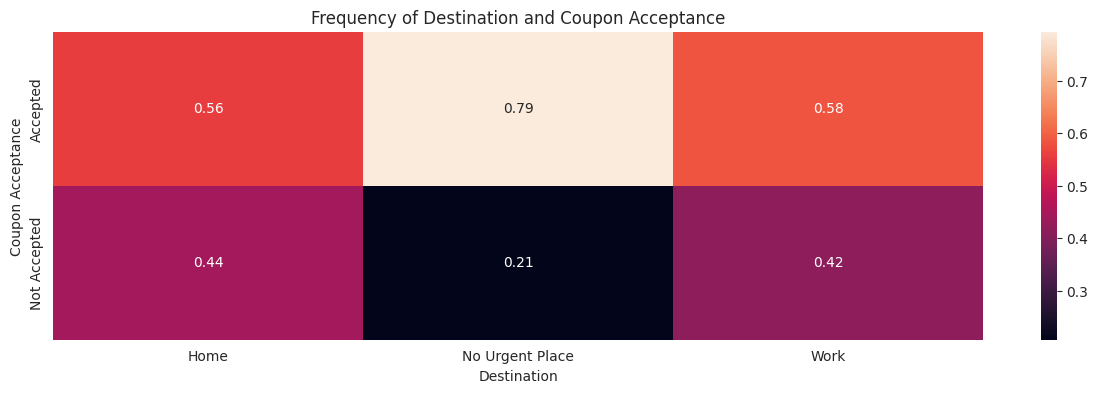

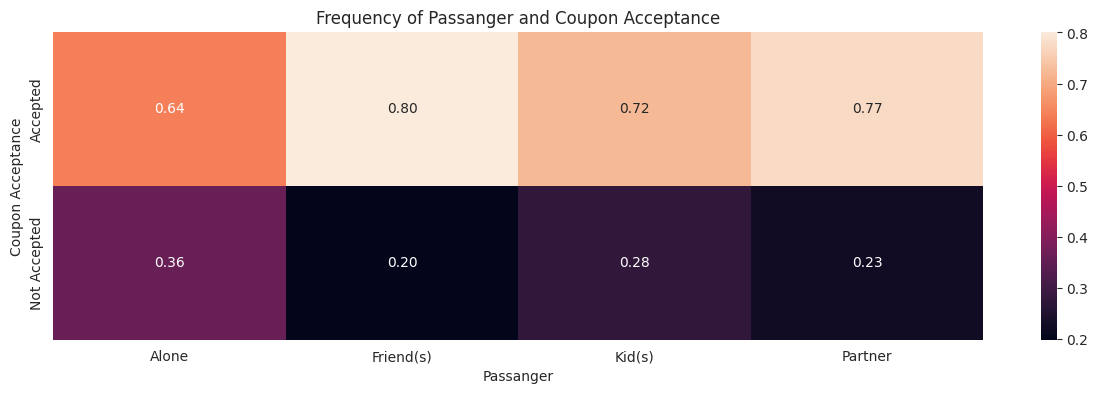

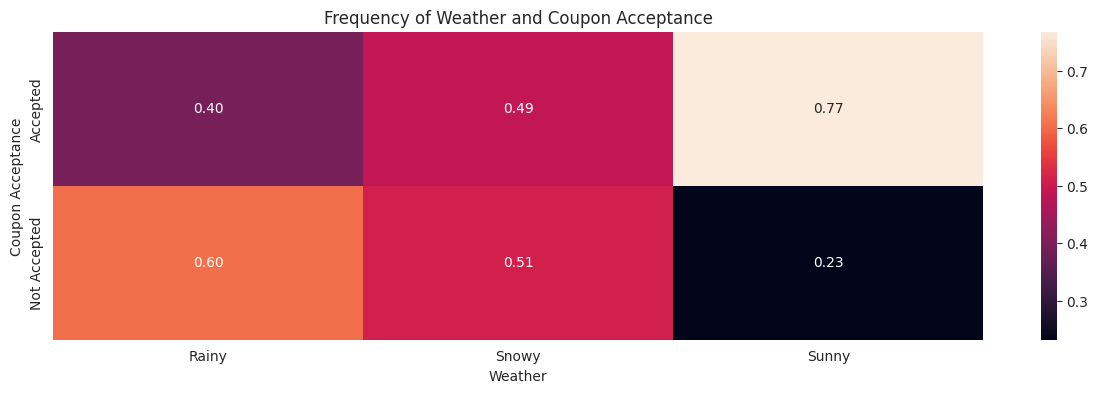

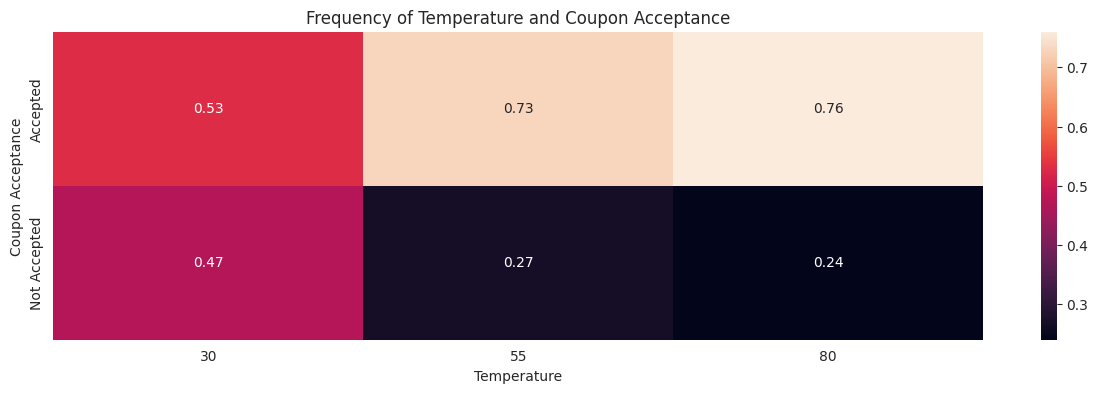

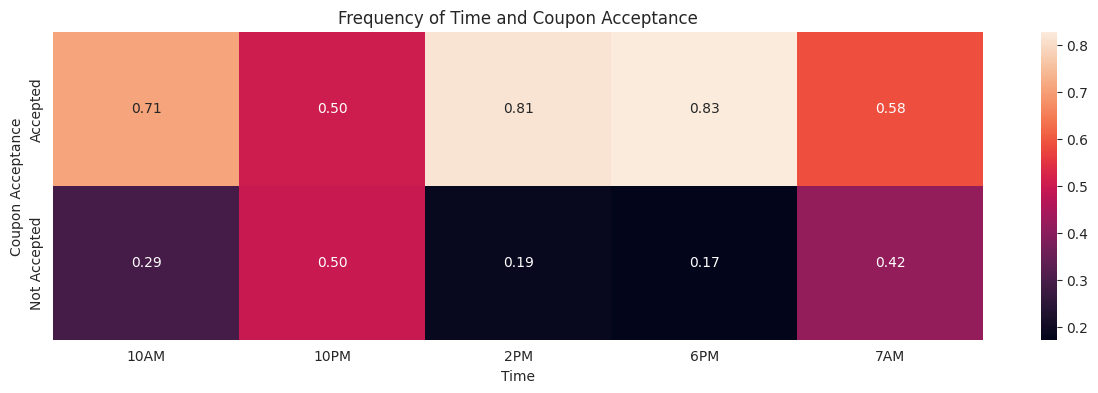

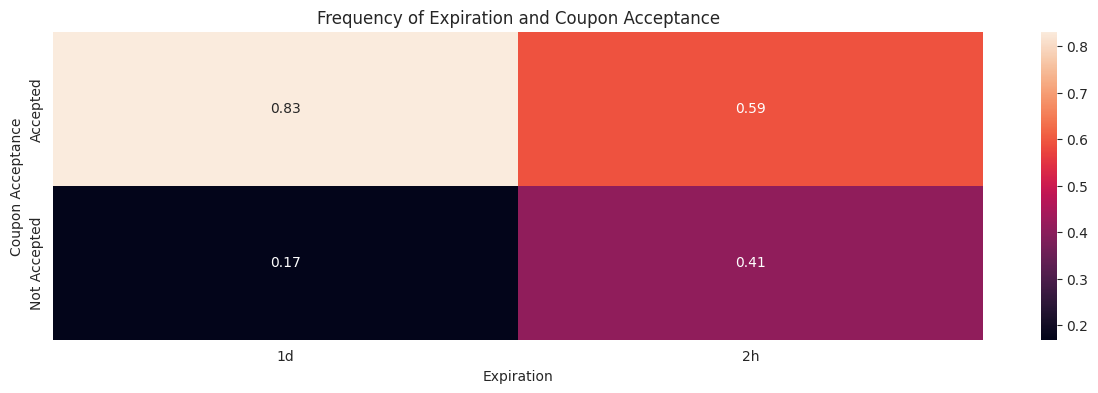

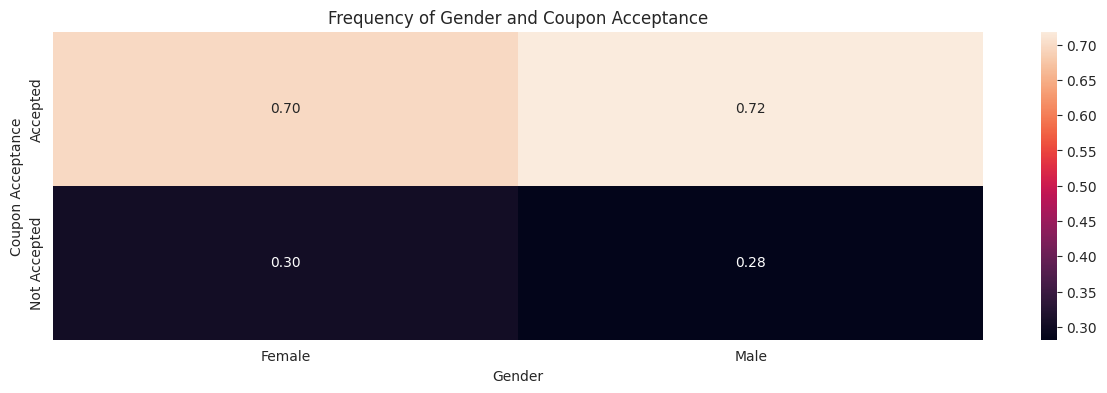

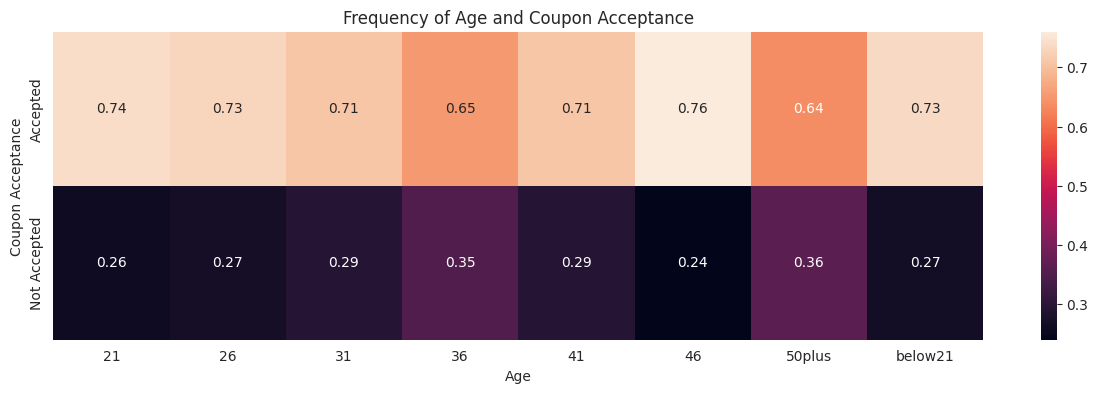

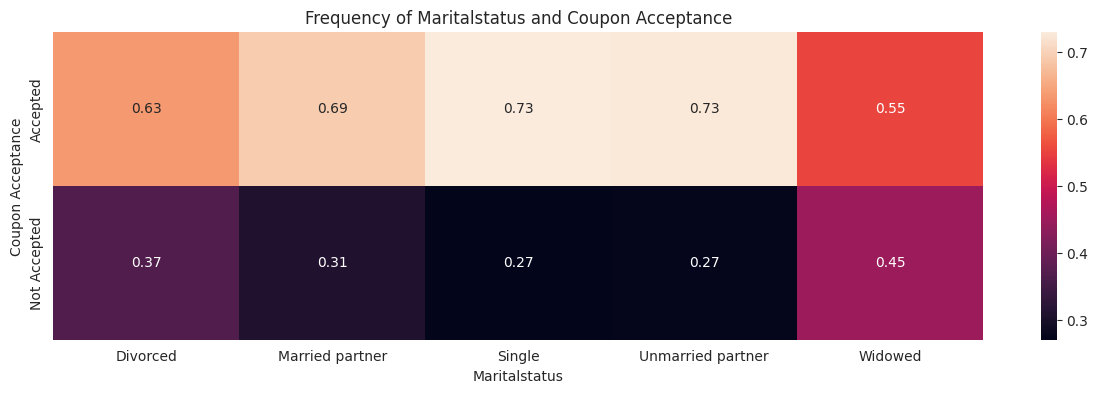

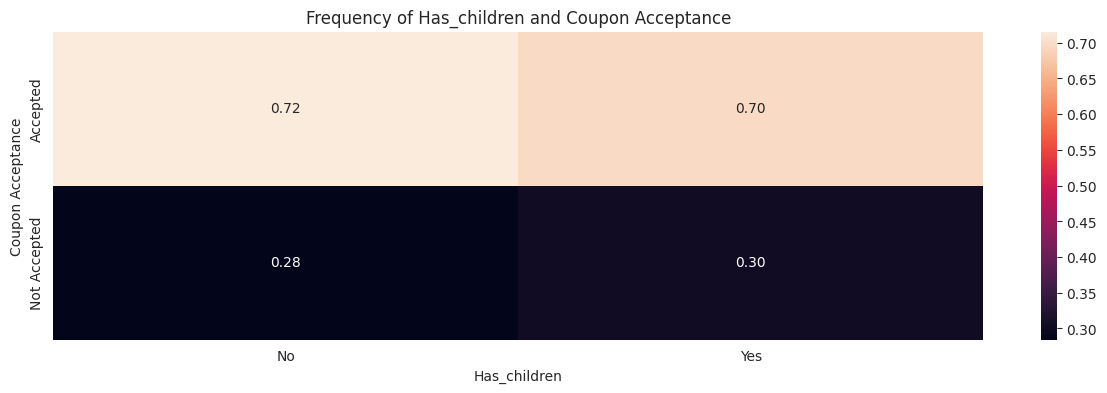

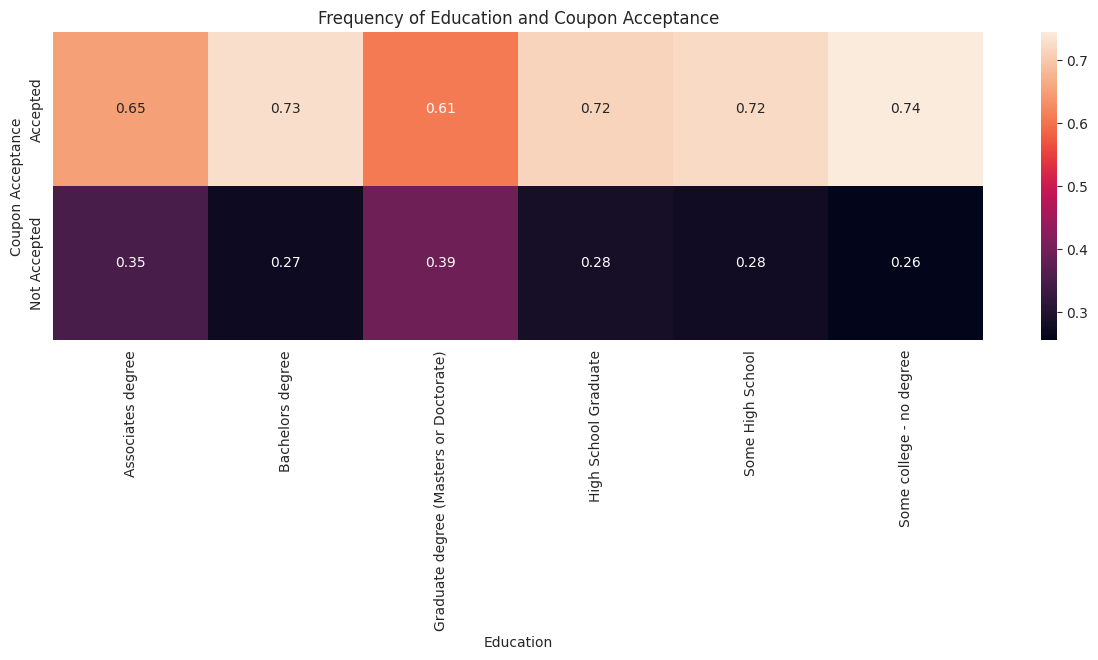

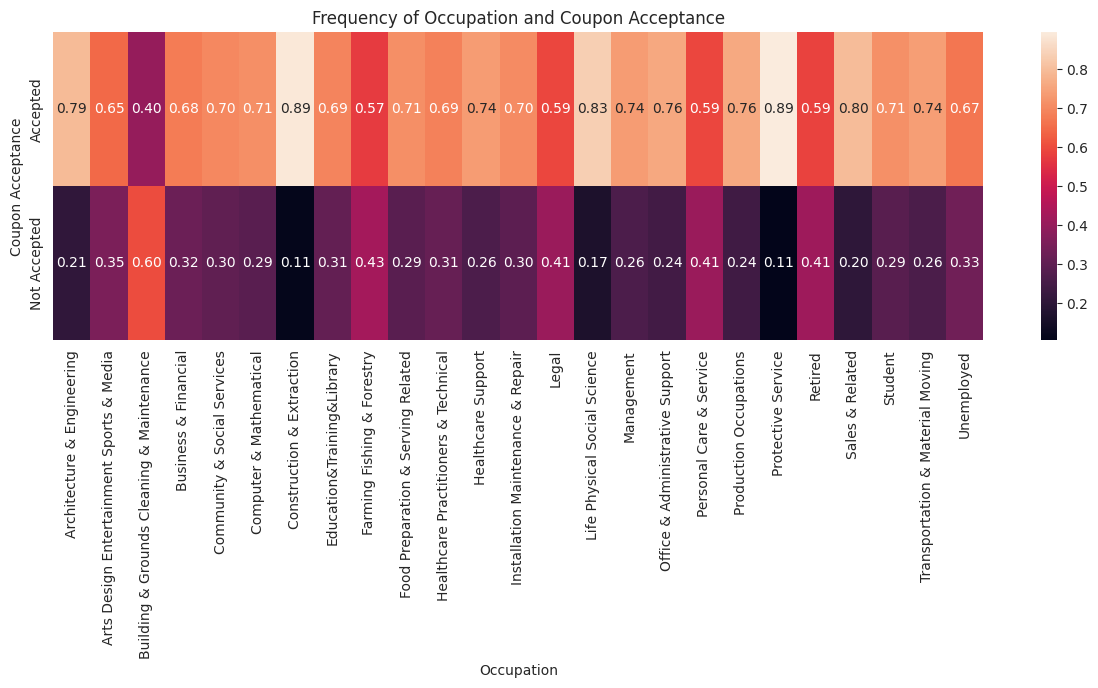

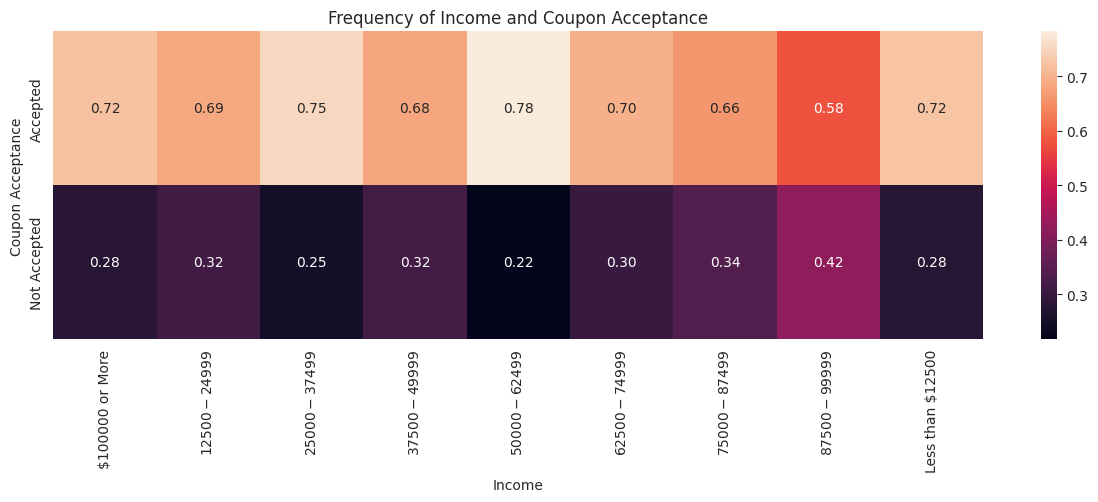

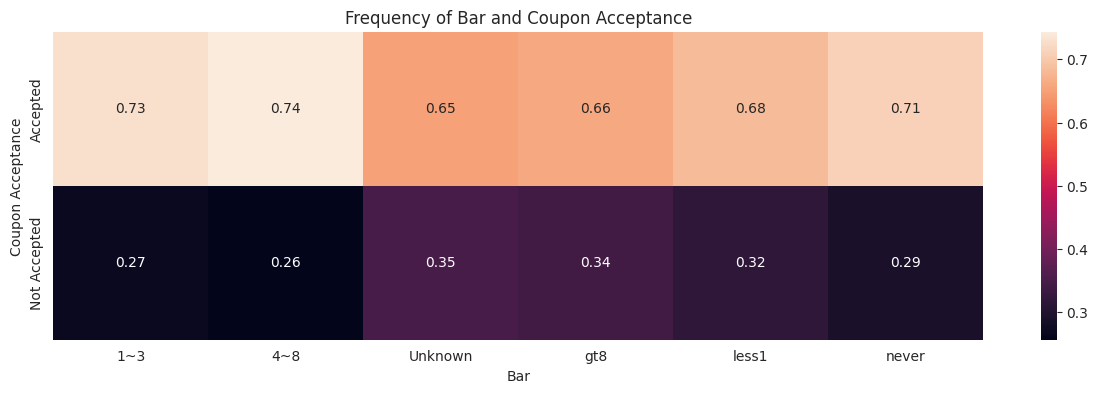

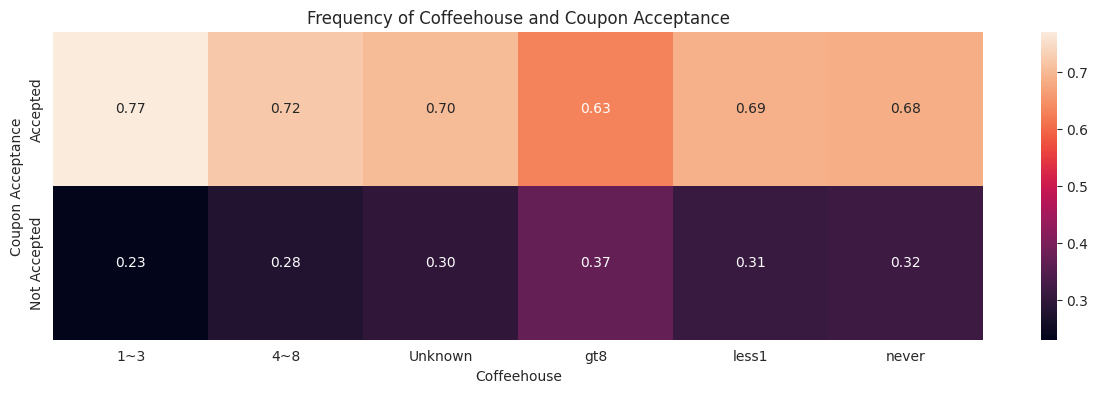

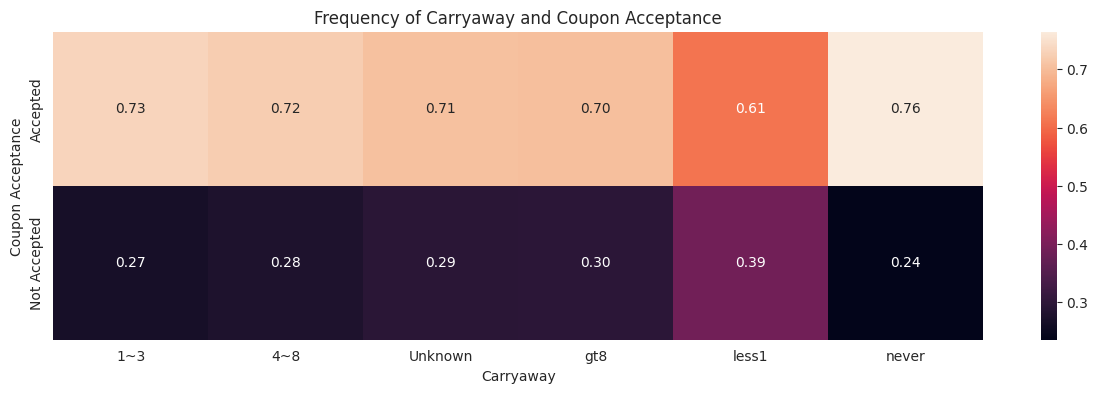

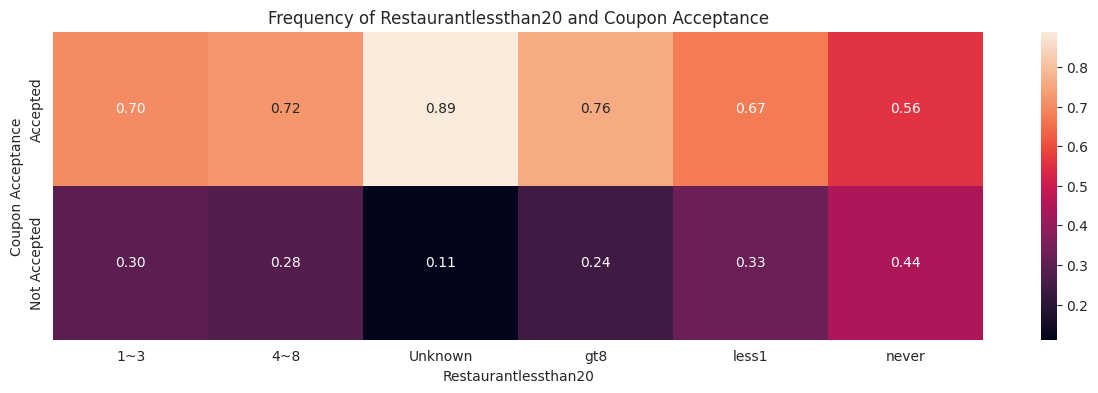

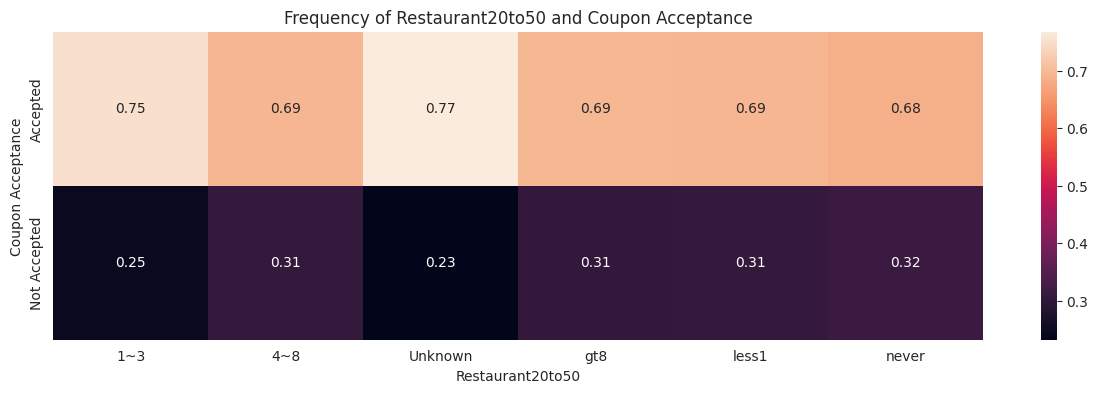

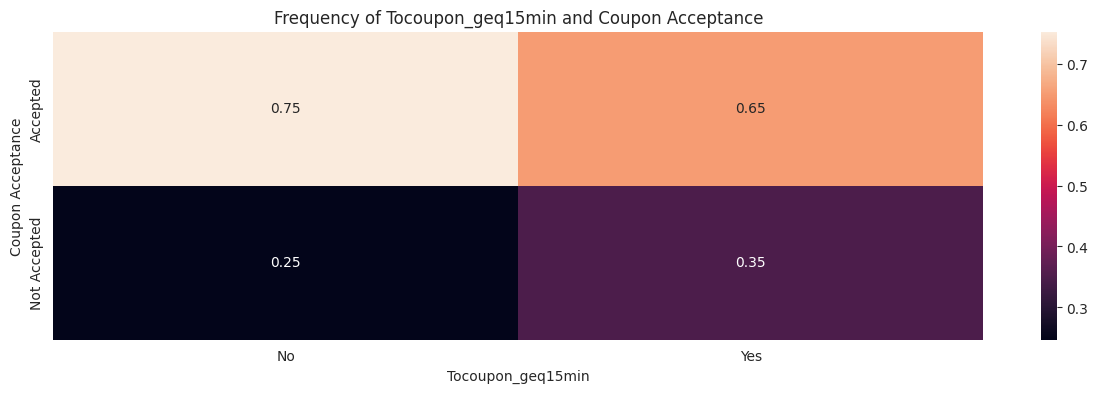

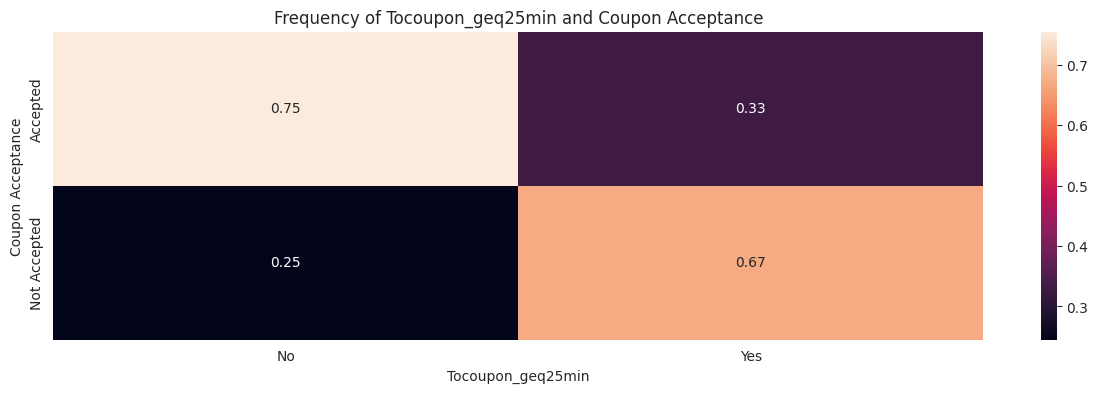

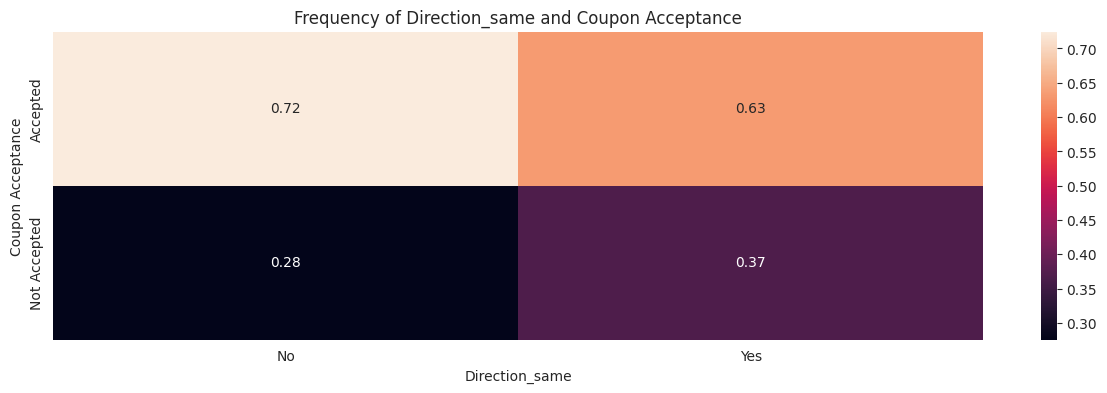

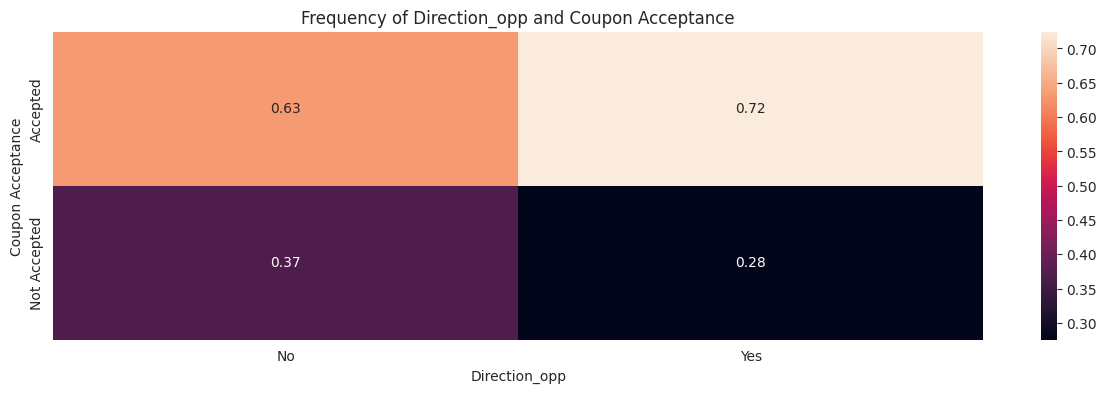

In [126]:
# The following code will create, for coupon type Restaurants(<20), frequency heat maps between the data columns and coupon column to visualize how the categories affect the customer's decision.

generate_heat_maps('Restaurant(<20)')

For the Restaurant (less than 20) coupon we can reach the following conclusions based on the ratios. The chances that the driver will use the coupon will increase under any of these conditions (in order of highest acceptance rate):

1.- Work in Protective Service or Construction & Extraction with 89% acceptance rate.

2.- The coupon expires in a day with 83% acceptance rate.

3.- Driving at 2pm or 6pm with 82% acceptance rate.

4.- With friend(s) with 80% acceptance rate.

5.- Not urgent to get to their destination with 79% acceptance rate.

6.- Earn less between 50000 and 62499 with 78% acceptance rate.

7.- Driving under sunny weather with 77% acceptance rate.

8.- Frequent a coffee shops 1 to 3 times with 77% acceptance rate.

9.- Never orders carry out or take away with 76% acceptance rate.

10.- Frequent restaurants (20) more than 8 times with 76% acceptance rate.

11.- Driving on temperature of 80 with 76% acceptance rate.

12.- Are 46 years old with 76% acceptance rate.

13.- Frequent restaurants (20-50) between 1 and 3 times with 75% acceptance rate.

14.- Have some college degree with 74% acceptance rate.

15.- Are single or have an unmarried partner with 73% acceptance rate.

16.- Frequent a bar between 1 to 8 times with 73% acceptance rate.

17.- Restaurant is 5 minutes in the opposite direction with 72% acceptance rate.

Consider sending the Restaurant (less than 20) coupons to customer under these conditions.

<ipython-input-124-bbc45a4c7e6d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,4))


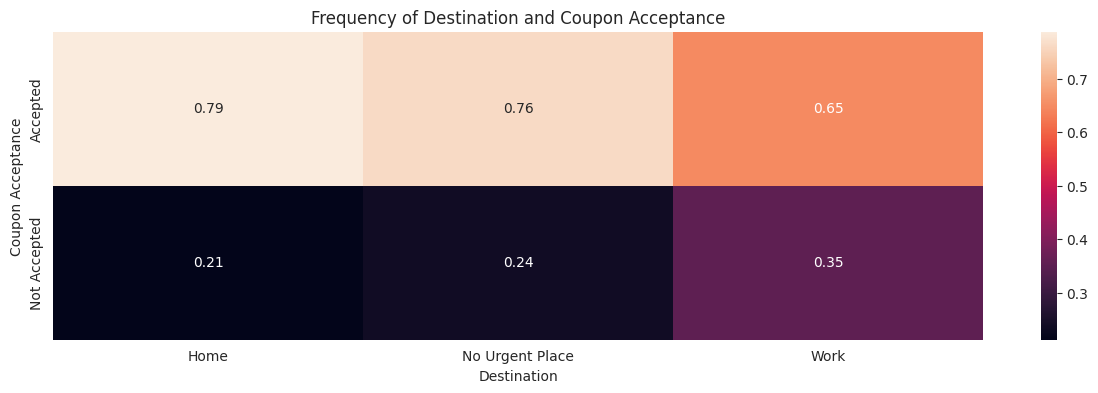

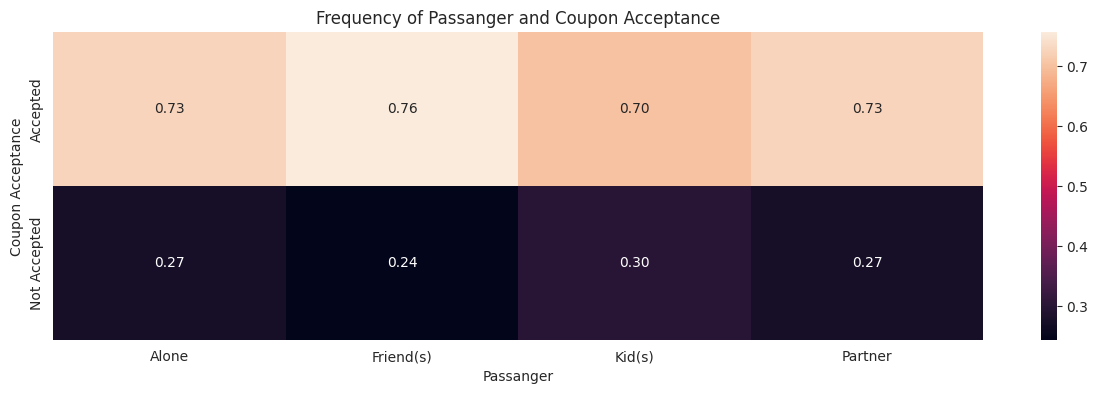

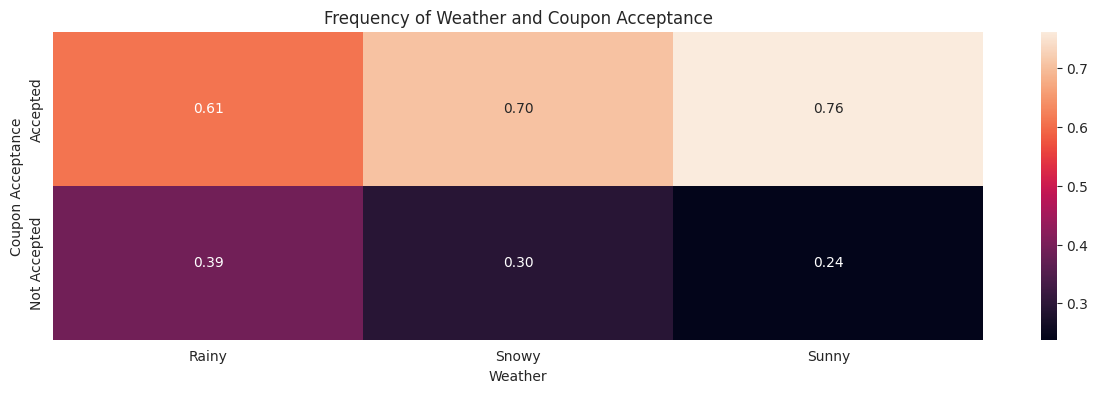

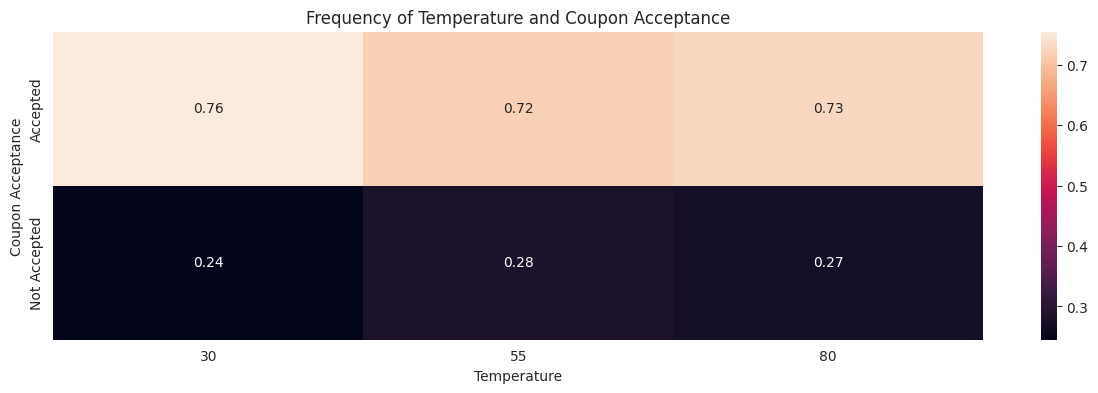

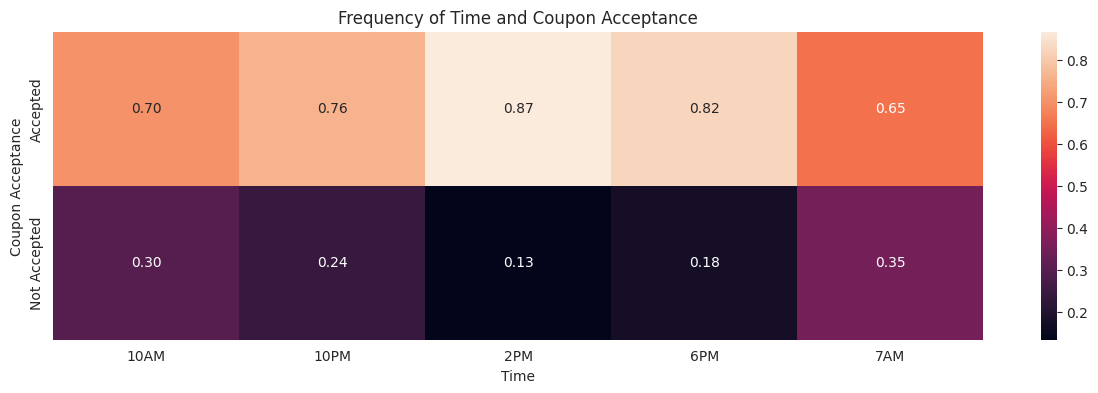

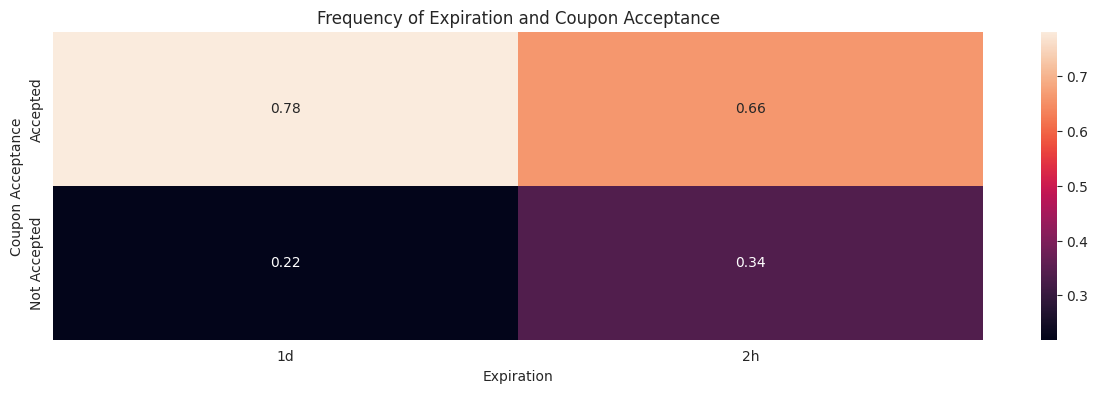

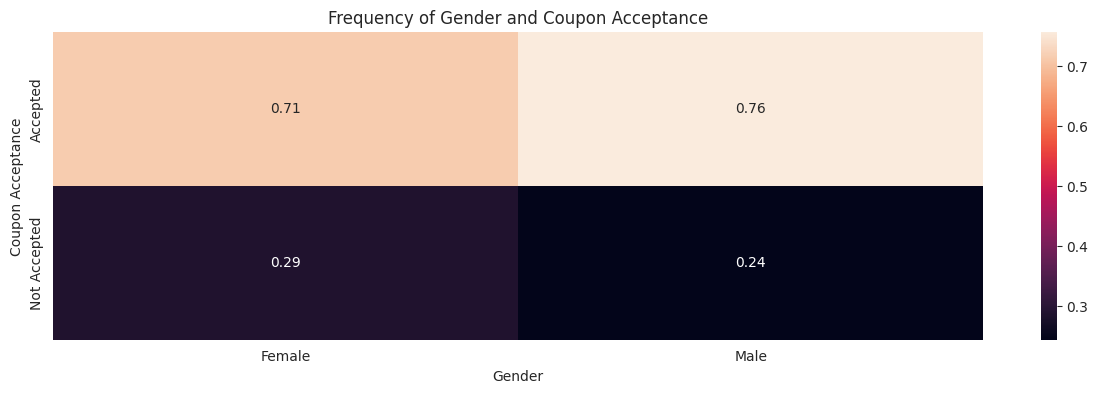

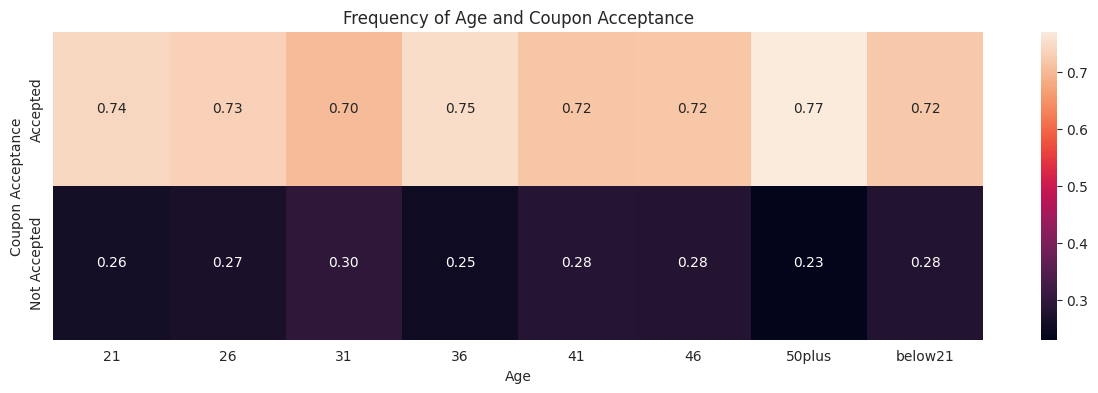

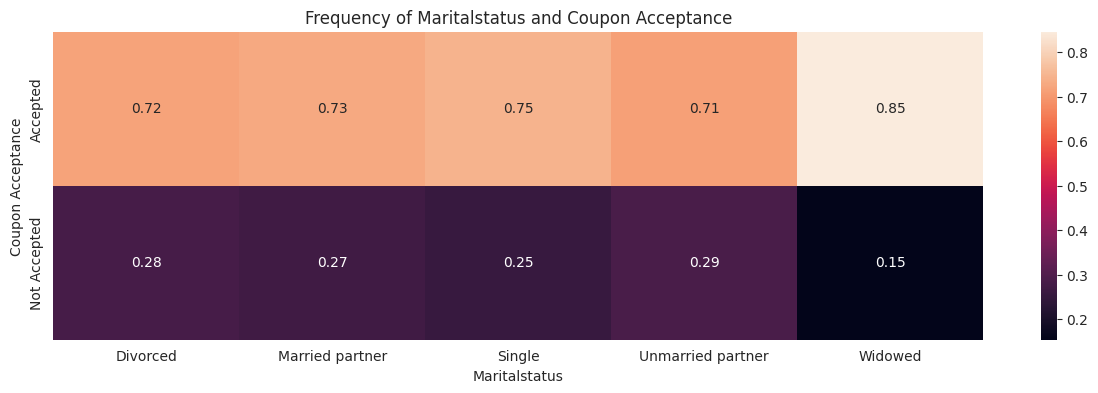

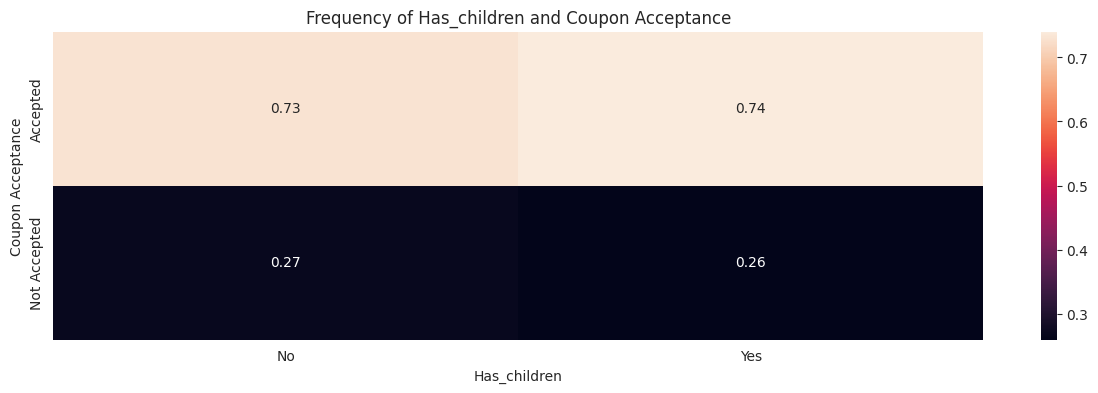

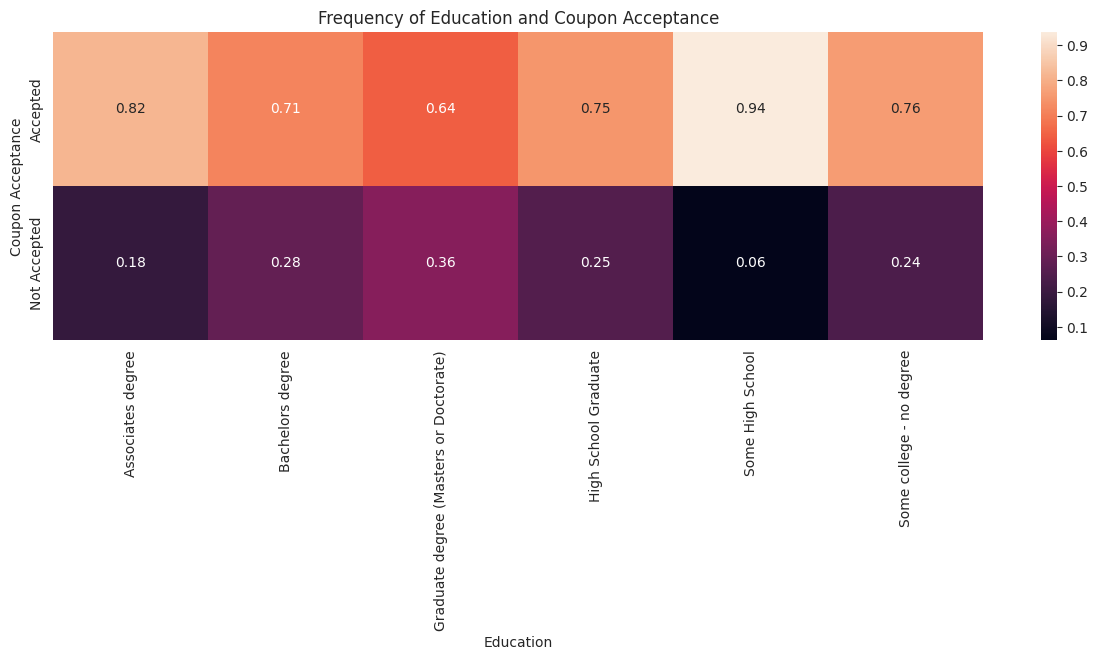

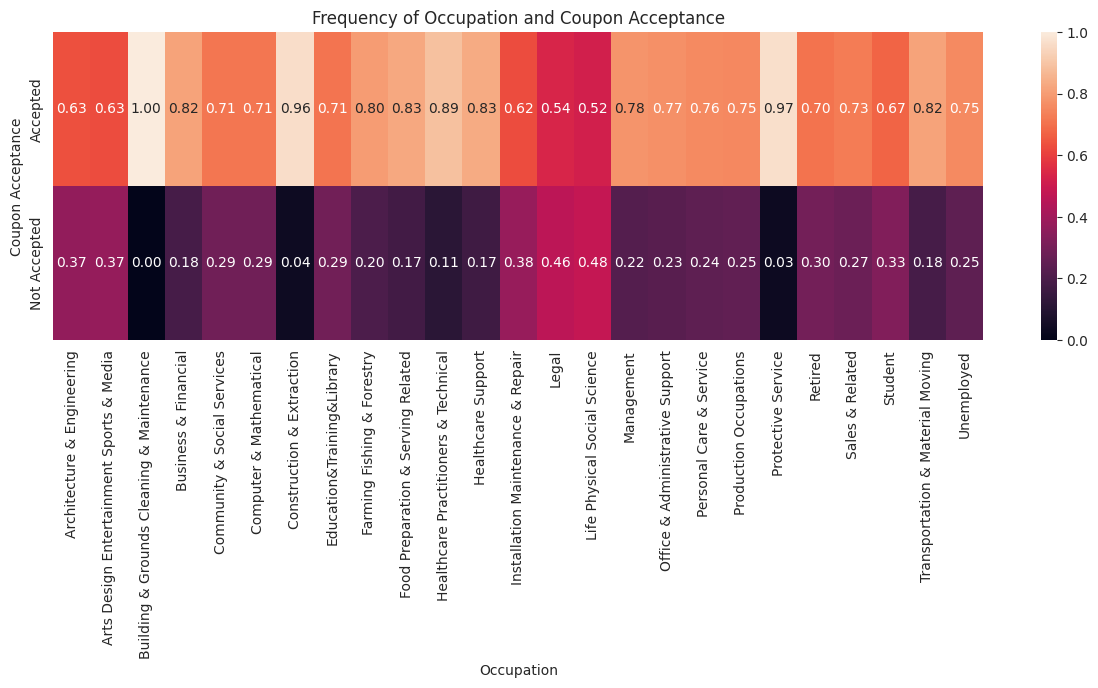

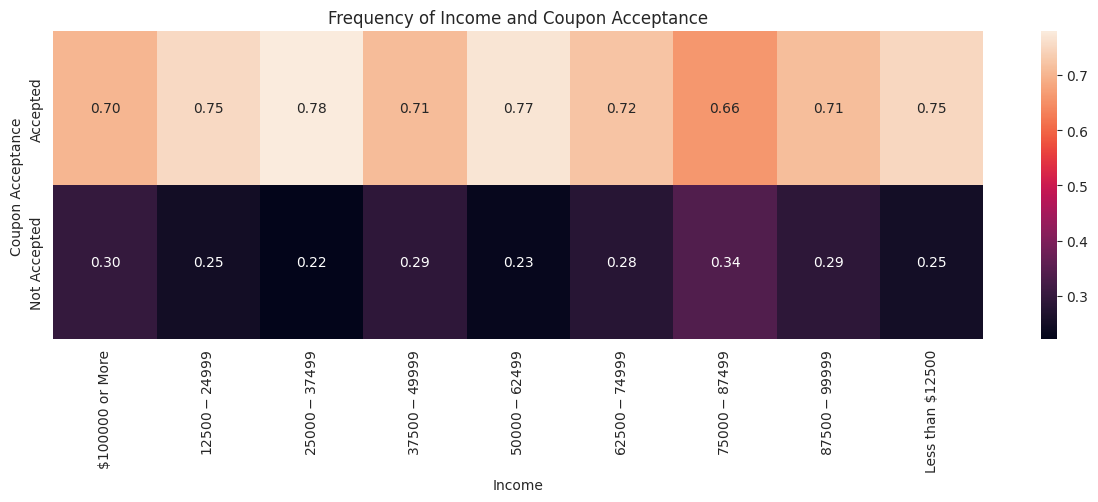

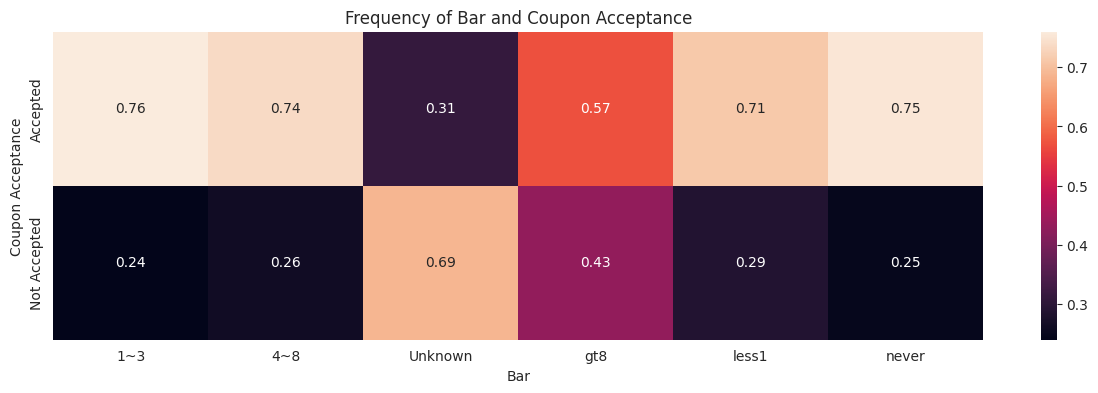

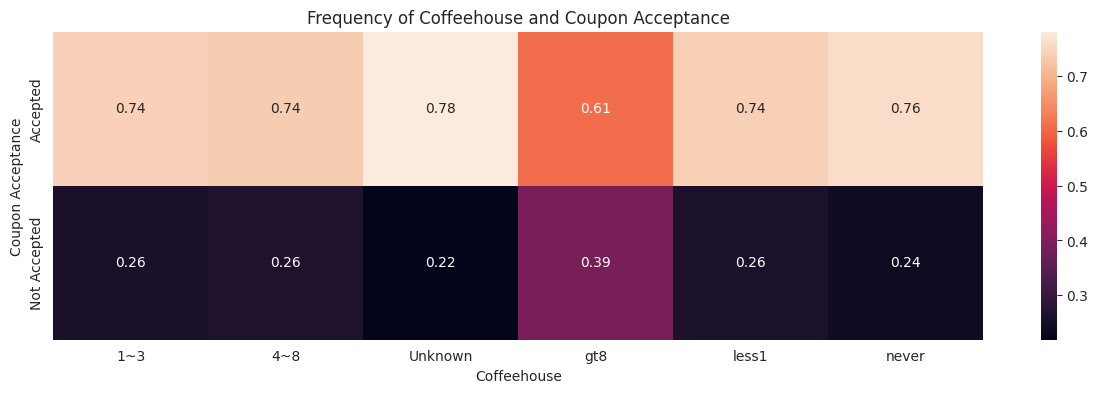

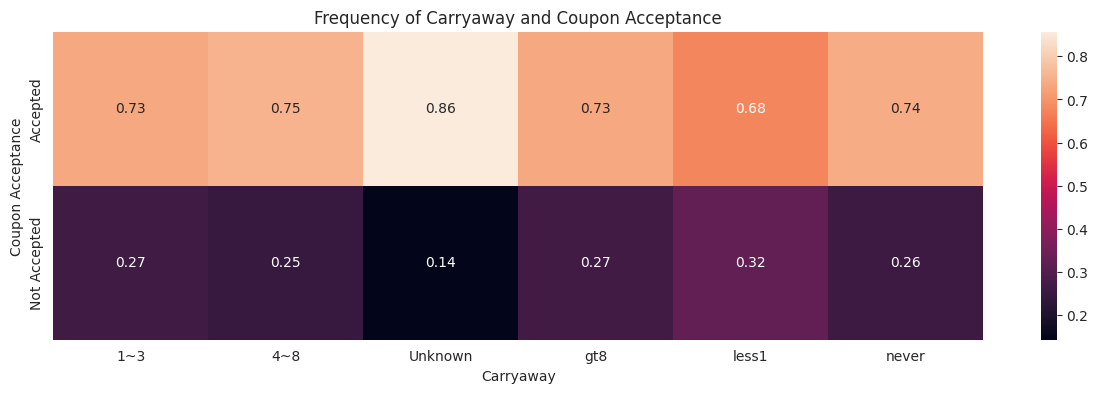

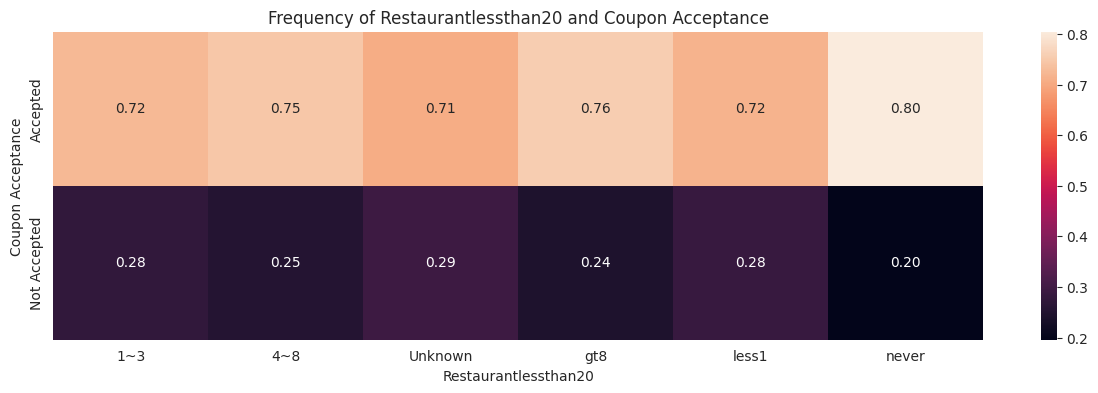

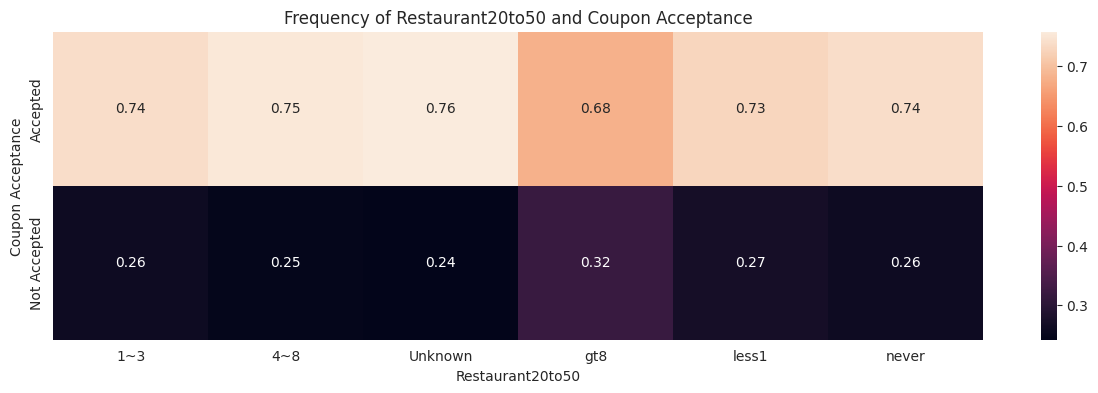

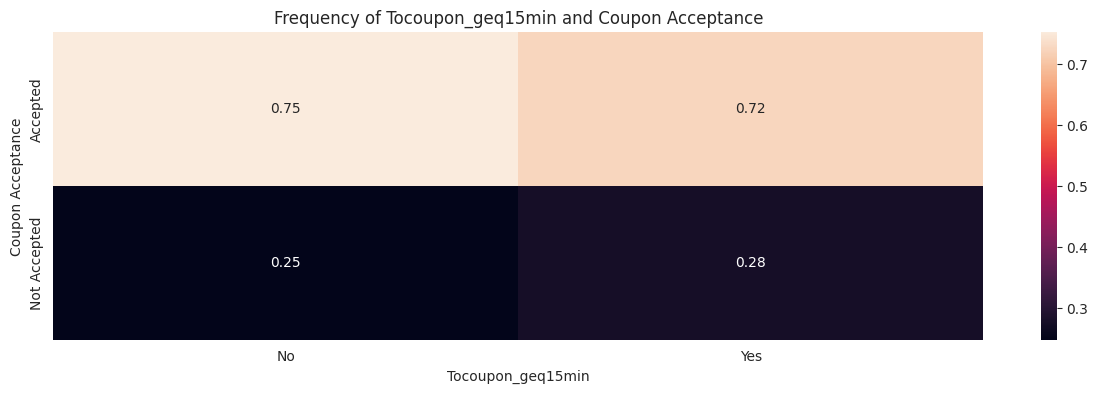

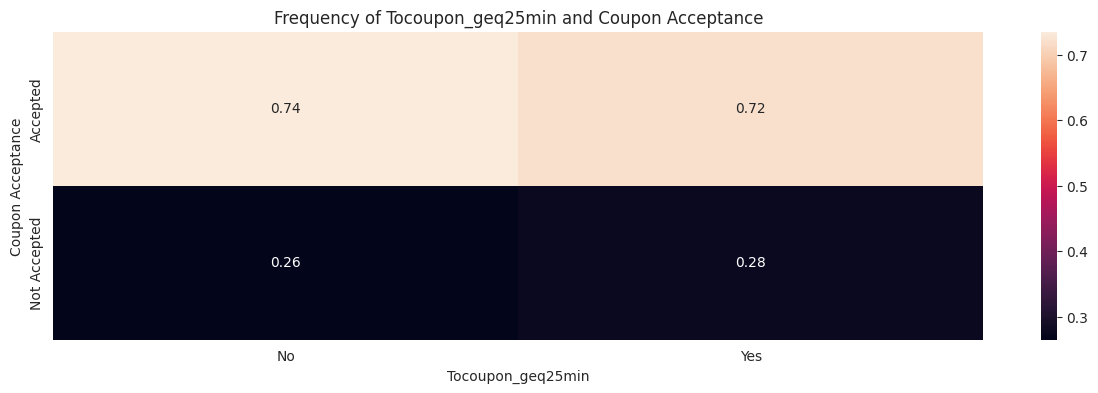

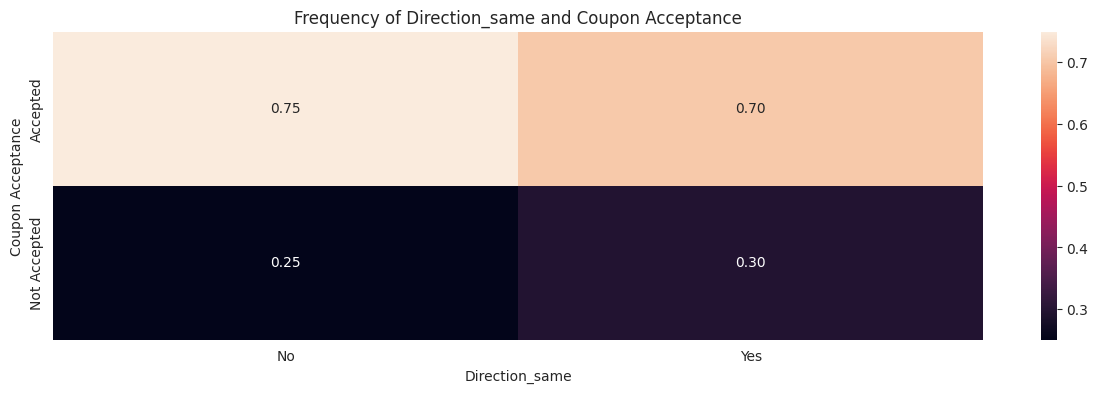

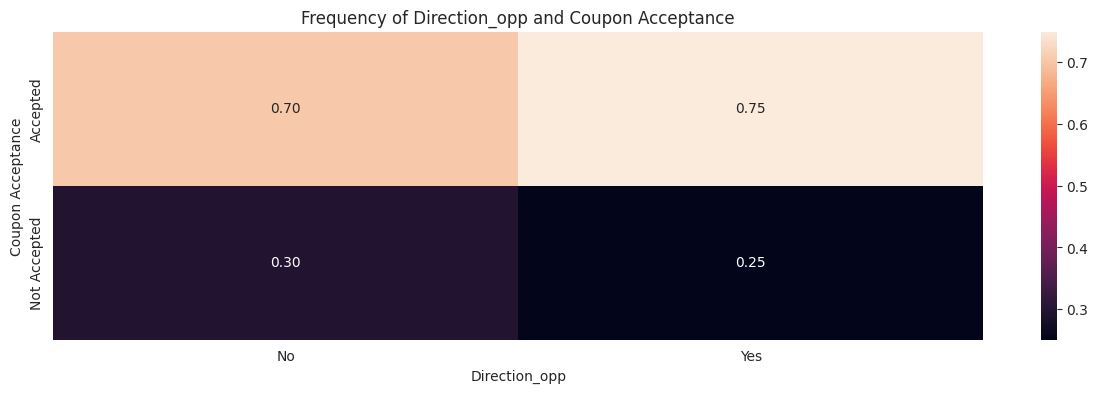

In [127]:
# The following code will create, for coupon type Carry out & Take away, frequency heat maps between the data columns and coupon column to visualize how the categories affect the customer's decision.

generate_heat_maps('Carry out & Take away')

For the Carry out & Take away coupon we can reach the following conclusions based on the ratios. The chances that the driver will use the coupon will increase under any of these conditions (in order of highest acceptance rate):

1.- Work in Building & Grounds Cleaning & Maintenance with 96% acceptance rate.

2.- Have some high school degree with 94% acceptance rate.

3.- Driving at 2pm with 87% acceptance rate.

4.- Are widowed with 85% acceptance rate.

5.- Never frequents restaurants (20) with 80% acceptance rate.

6.- Driving home with 79% acceptance rate.

7.- The coupon expires in a day with 78% acceptance rate.

8.- Earn less between 25000 and 37499 with 78% acceptance rate.

9.- Are above 50 years old with 77% acceptance rate.

10.- With friend(s) with 76% acceptance rate.

11.- Driving under sunny weather with 76% acceptance rate.

12.- Driving on temperature of 30 with 76% acceptance rate.

13.- Are male with 76% acceptance rate.

14.- Never frequents a coffee shops with 76% acceptance rate.

15.- Frequent a bar 0 to 3 times with 75% acceptance rate.

16.- Orders carry away more between 4 to 8 times with 75% acceptance rate.

17.- Carry out & Take away is 5 minutes in the opposite direction with %75 acceptance rate.

18.- Frequent restaurants (20-50) between 0 to 8 times with 74% acceptance rate.

Consider sending the Carry out & Take away coupons to customer under these conditions.

<ipython-input-124-bbc45a4c7e6d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,4))


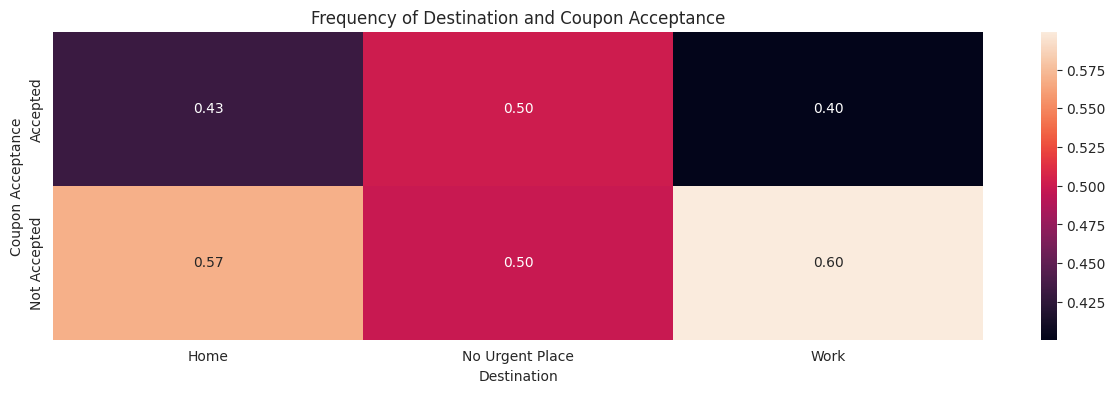

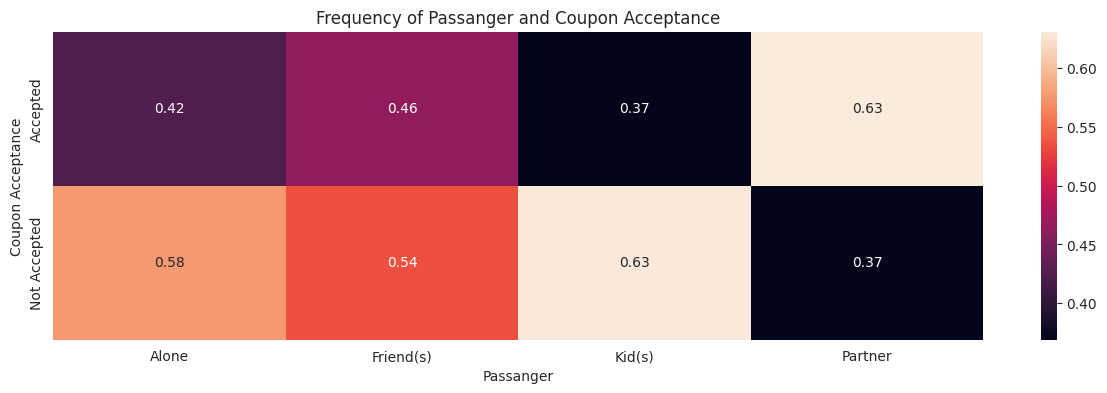

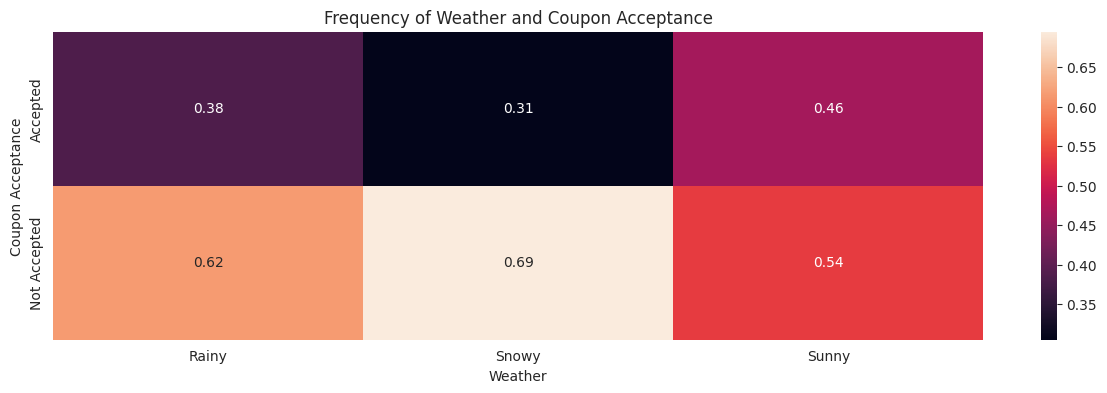

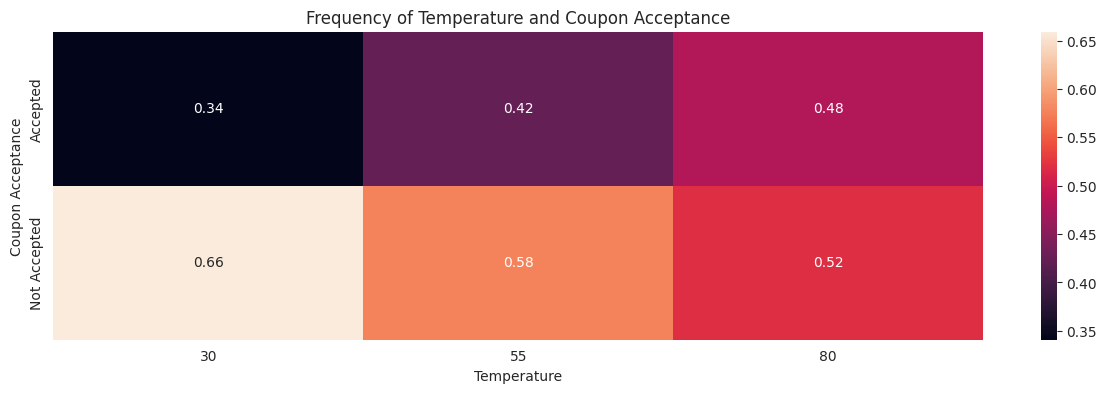

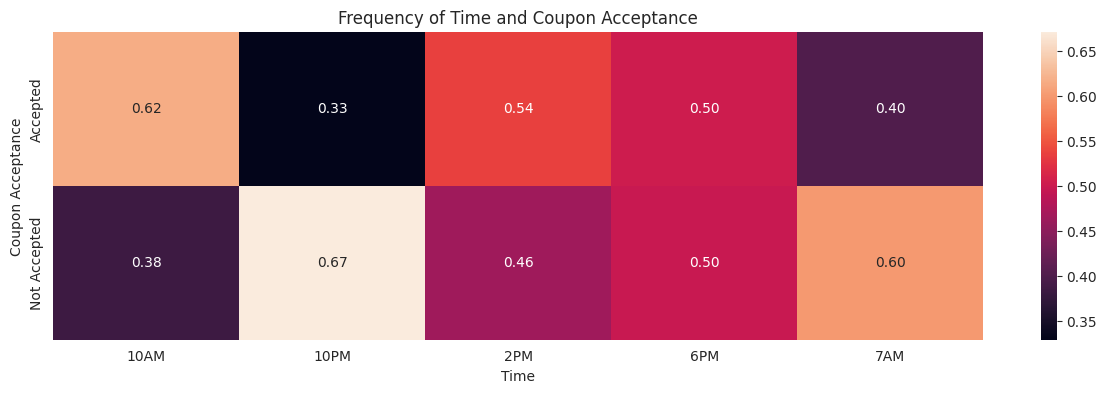

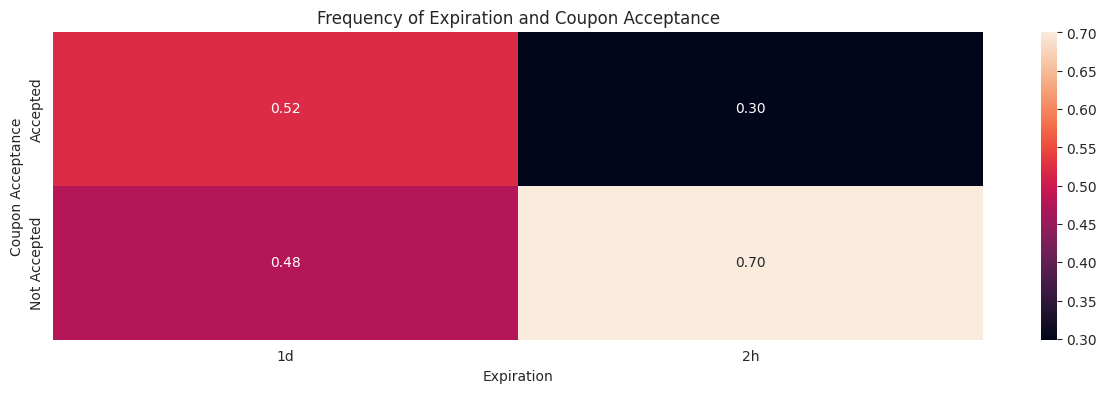

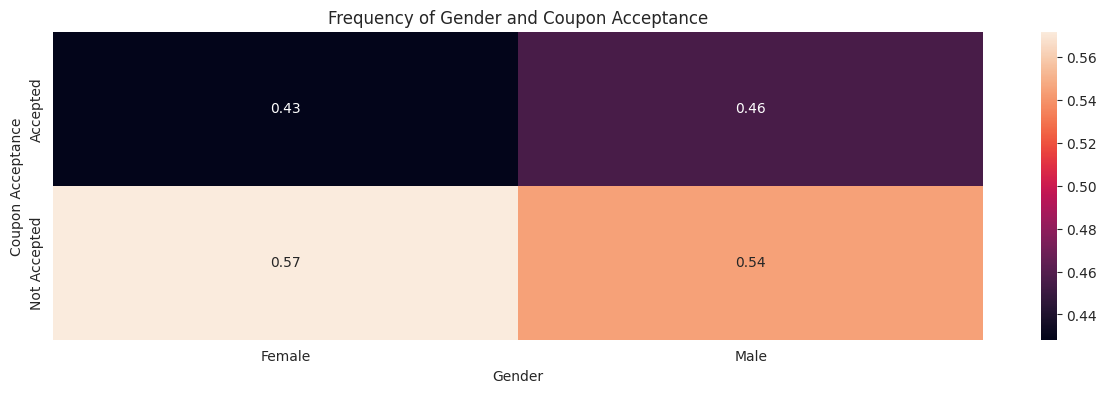

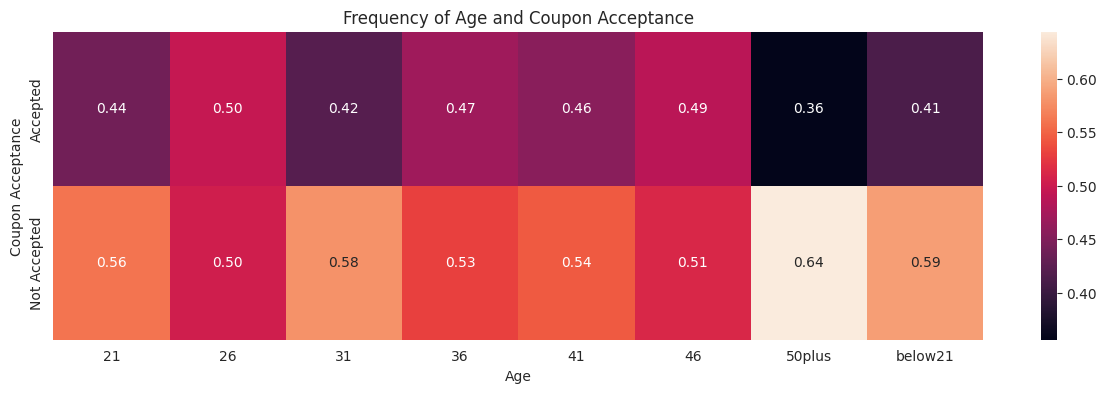

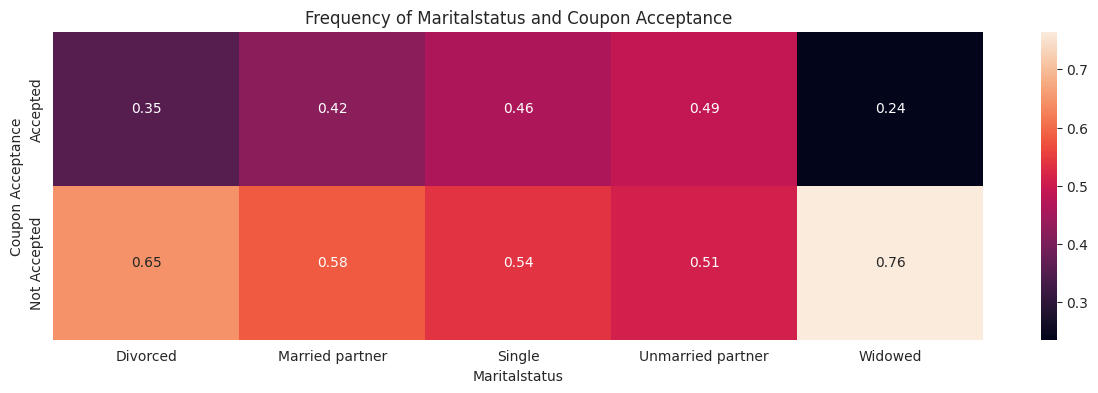

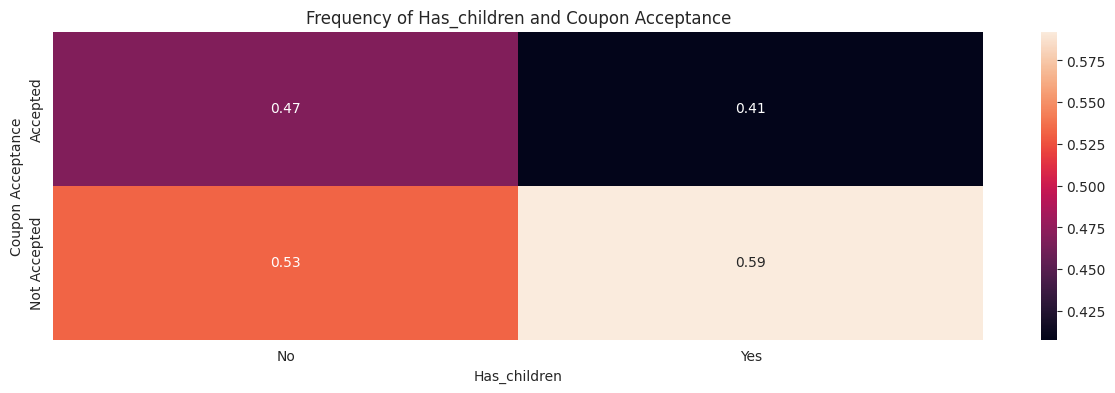

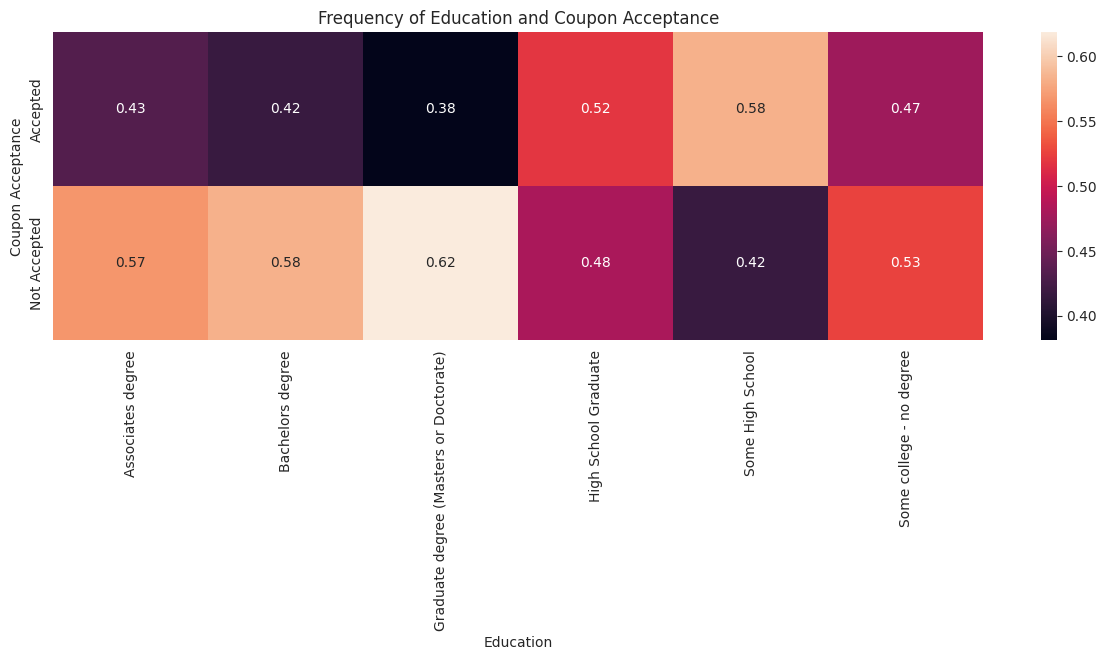

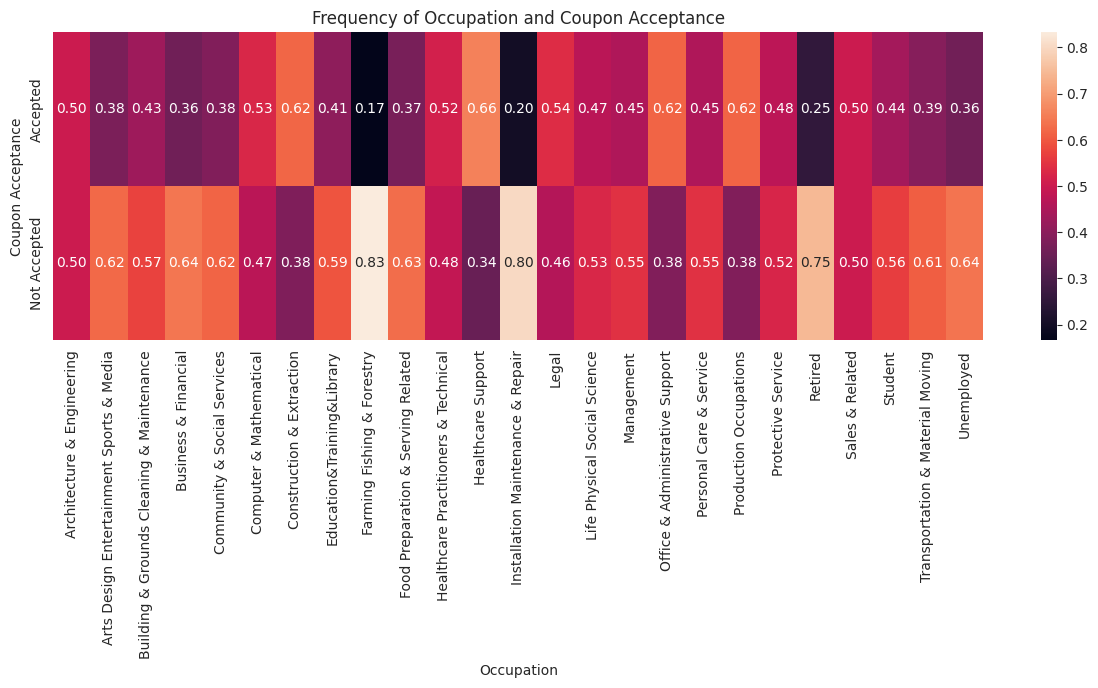

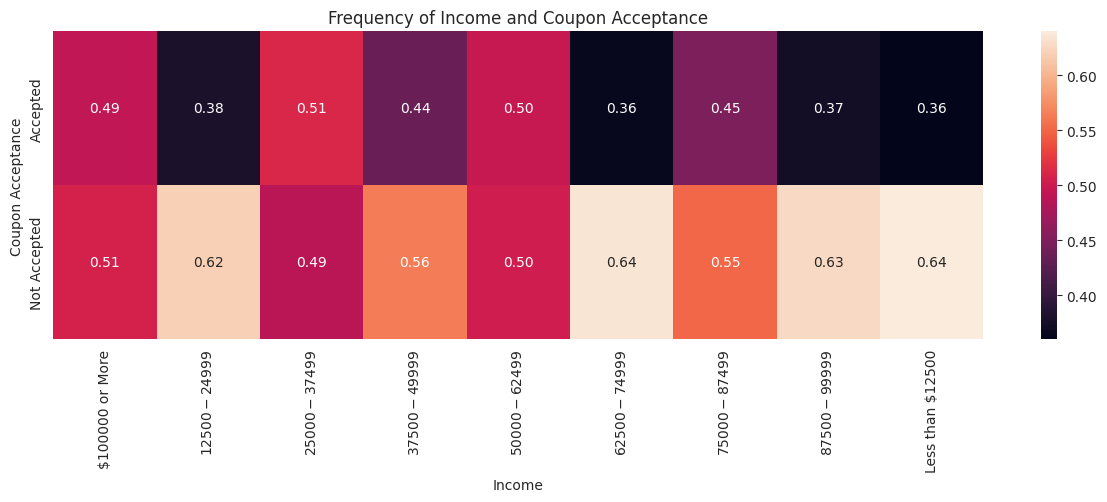

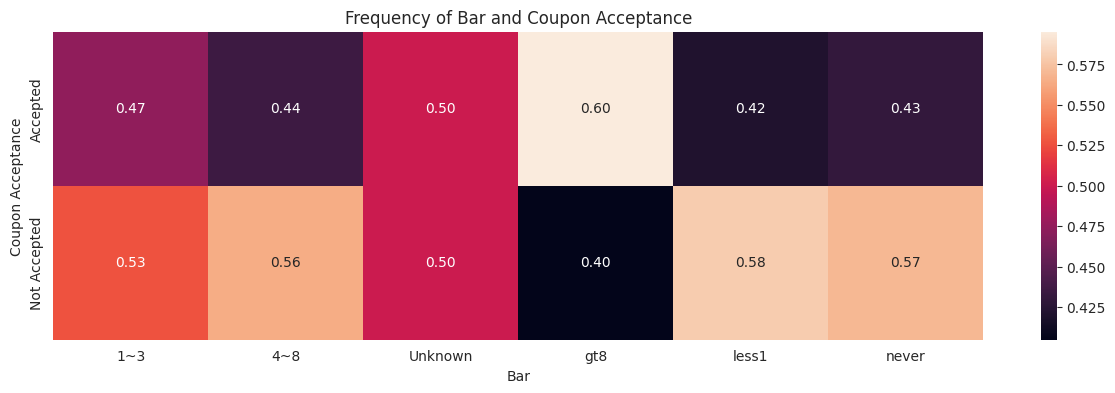

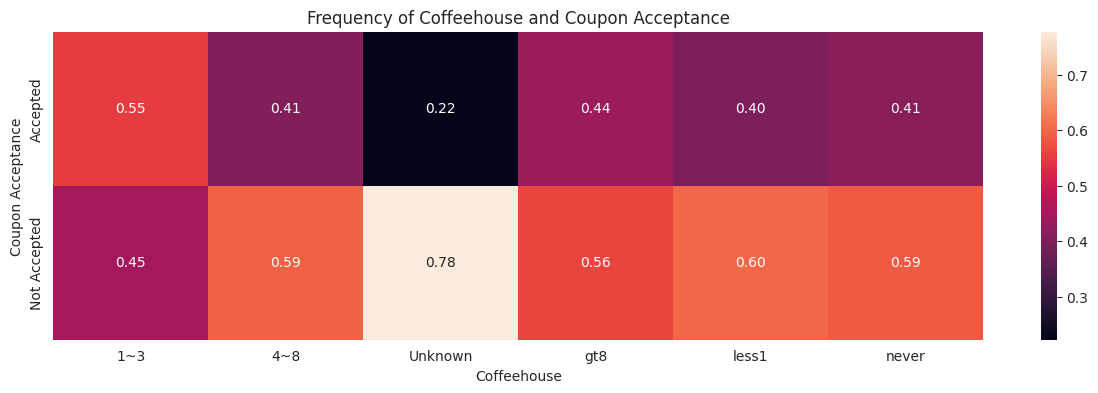

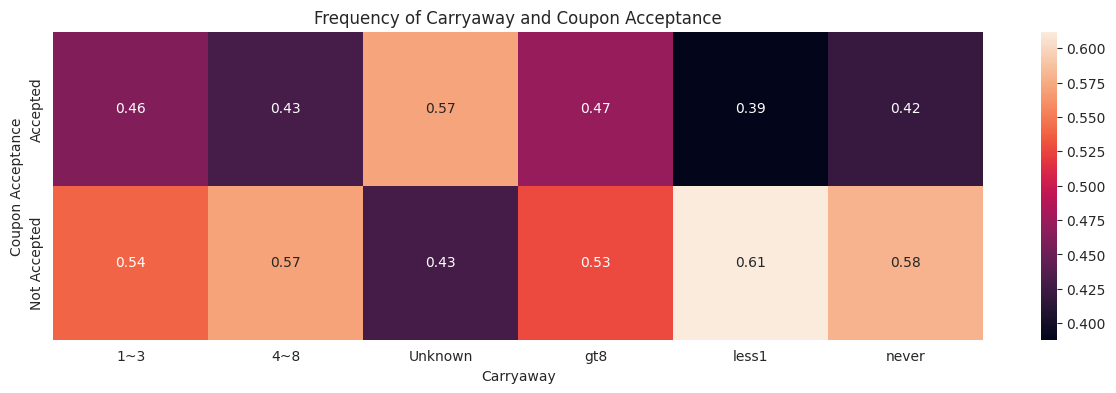

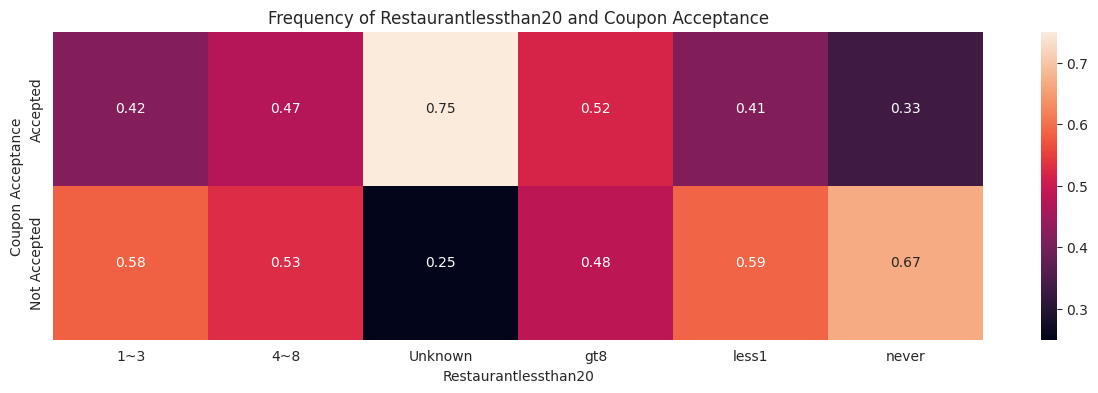

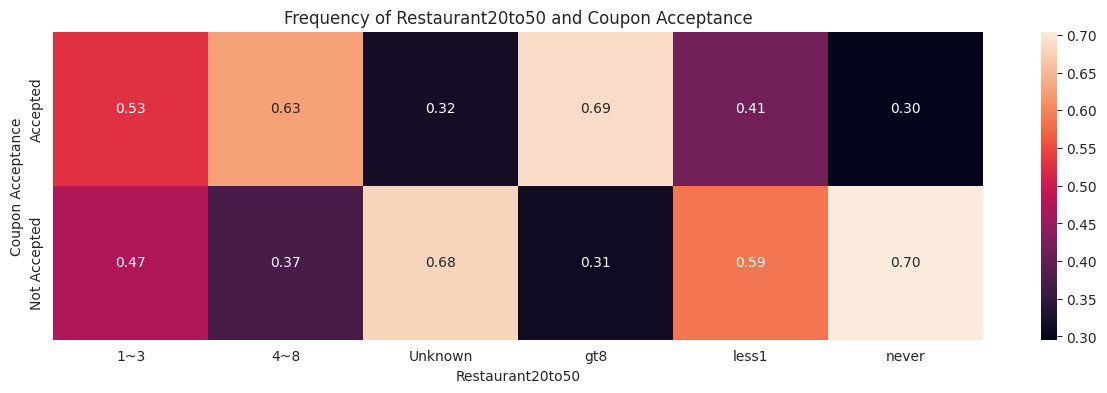

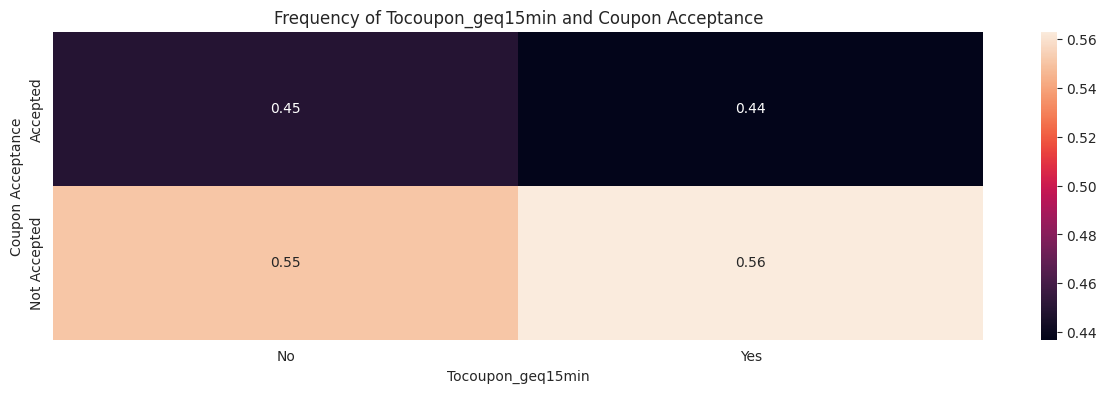

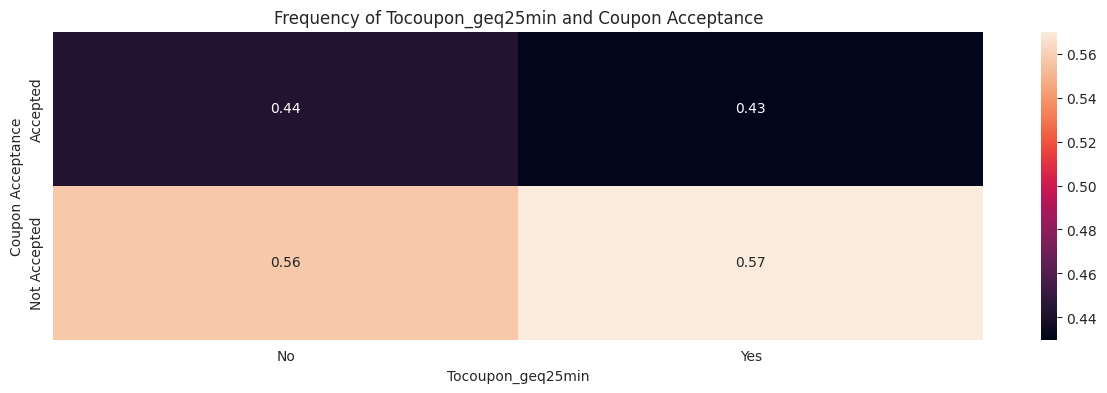

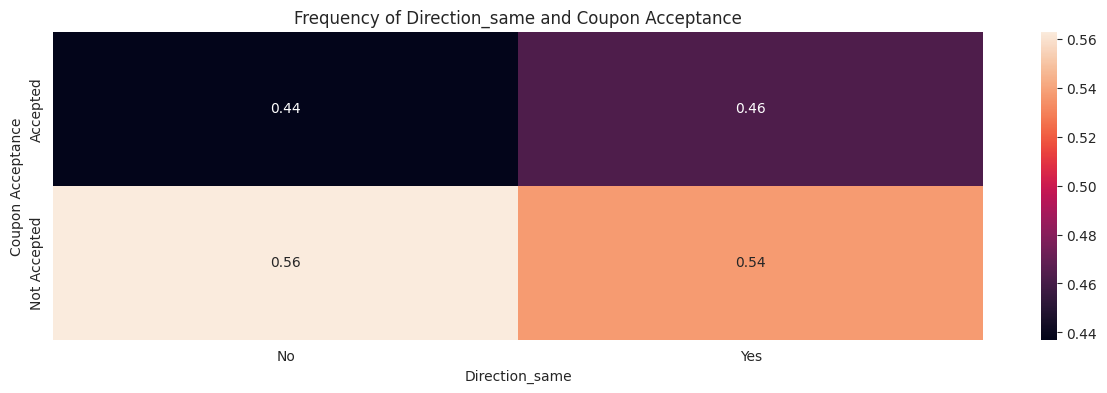

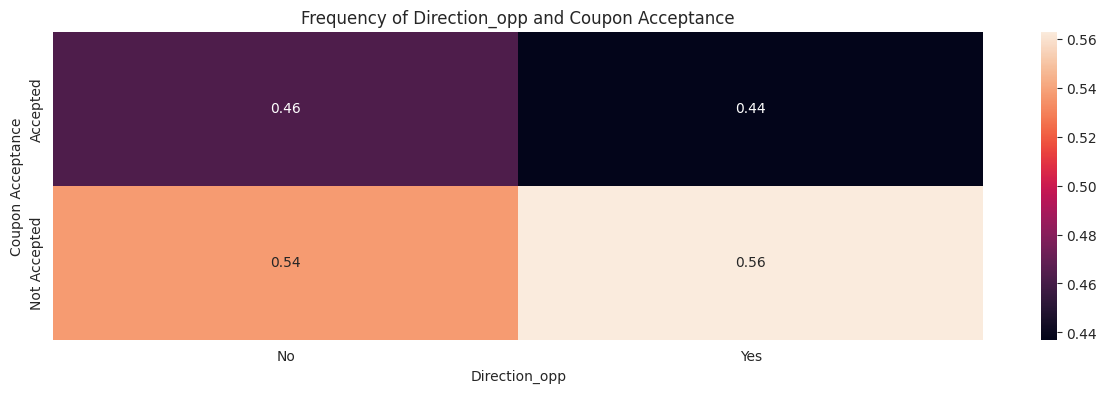

In [128]:
# The following code will create, for coupon type Restaurant(20-50), frequency heat maps between the data columns and coupon column to visualize how the categories affect the customer's decision.

generate_heat_maps('Restaurant(20-50)')

For the Restaurant(between 20 and 50) coupon we can reach the following conclusions based on the ratios. The chances that the driver will use the coupon will increase under any of these conditions (in order of highest acceptance rate):

1.- Frequent restaurants (20-50) more than 8 times with 69% acceptance rate.

2.- Work in Healthcare Support with 66% acceptance rate.

3.- Driving with partner with 63% acceptance rate.

4.- Driving at 10am with 62% acceptance rate.

5.- Frequent a bar more than 8 times with 60% acceptance rate.

6.- Have some high school degree with 58% acceptance rate.

7.- Frequent a coffee shops 1 to 3 times with 55% acceptance rate.

8.- The copupon expires in a day with 52% acceptance rate.

9.- Frequent restaurants (20) more than 8 times with 52% acceptance rate.

10.- Earn between 25000 and 37499 with 51% acceptance rate.

11.- Not urgent to get to their destination with 50% acceptance rate.

12.- Are 26 or 46 years old with 49% acceptance rate.

13.- Have an unmarried partner with 49% acceptance rate.

14.- Driving on temperature of 80 with 48% acceptance rate.

15.- Does not have children with 47% acceptance rate.

16.- Orders carry out or take away more than 8 times with 47% acceptance rate.

17.- Driving under sunny weather with 46% acceptance rate.

18.- Restaurant is 5 minutes in the same direction with 46% acceptance rate.

Consider sending the Restaurant(between 20 and 50) coupons to customer under these conditions.